In [1]:
# All imports in one place. Bringing in csv to work with and checking to make sure it was imported.

import numpy as np

import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import patches

from scipy import stats
from scipy.stats import norm

from statistics import mode

import seaborn as sns

import time
from datetime import datetime

import plotly
plotly.__version__

import plotly.plotly as py
from plotly.grid_objs import Grid, Column
from plotly.tools import FigureFactory as FF 

import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.datasets.samples_generator import make_blobs
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import warnings; warnings.simplefilter('ignore')
sns.set_style("white")
import warnings; warnings.filterwarnings(action='ignore')

In [2]:
damage = pd.read_csv('https://raw.githubusercontent.com/labs13-quake-viewer/ds-data/danielle-romanoff/final_damage.csv')
damage.columns

Index(['Tsunami', 'Name', 'Latitude', 'Longitude', 'Depth', 'Magnitude',
       'Date', 'Deaths', 'Missing', 'Injuries', 'Damage', 'Houses Destroyed',
       'Houses Damaged'],
      dtype='object')

In [3]:
# Formatting data in the dataframe for all to be the same format

damage['Date'] = pd.to_datetime(damage['Date'])
damage.head()

,Tsunami,Name,Latitude,Longitude,Depth,Magnitude,Date,Deaths,Missing,Injuries,Damage,Houses Destroyed,Houses Damaged
0,1.0,"PERU: LIMA,SALINAS-HUAURA,LIMA,CALLAO,CHANCAY",-9.0,-79.0,40.0,8.4,1678-06-18,1000.0,0.0,0.0,12500000.0,1000.0,0.0
1,1.0,PERU: LIMA,-13.5,-76.5,30.0,8.5,1687-10-20,10000.0,0.0,0.0,12500000.0,0.0,0.0
2,0.0,RUSSIA: TERSK,43.7,44.7,15.0,5.3,1688-01-01,0.0,0.0,0.0,2500000.0,0.0,0.0
3,0.0,ECUADOR: TIXAN,-2.2,-78.9,5.0,6.8,1689-03-01,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,BALKANS NW: SLOVENIA: LJUBLJANA,45.6,15.3,6.0,5.0,1699-02-11,100.0,0.0,0.0,12500000.0,0.0,0.0


In [4]:
# Making copies of the damage dataframe for different uses

copy_of_damage = damage.copy()
damage_to_encode = damage.copy()

In [5]:
# Making a dataframe of damage that's encoded

le = LabelEncoder()
damage_encoded = damage_to_encode.apply(le.fit_transform)

In [6]:
# Checking encoding was successful

damage_encoded.head()

,Tsunami,Name,Latitude,Longitude,Depth,Magnitude,Date,Deaths,Missing,Injuries,Damage,Houses Destroyed,Houses Damaged
0,1,718,151,167,40,44,0,74,0,0,37,32,0
1,1,715,118,202,30,45,1,174,0,0,37,0,0
2,0,828,812,556,15,13,2,0,0,0,14,0,0
3,0,279,209,169,5,28,3,0,0,0,0,0,0
4,0,103,858,385,6,10,4,43,0,0,37,0,0


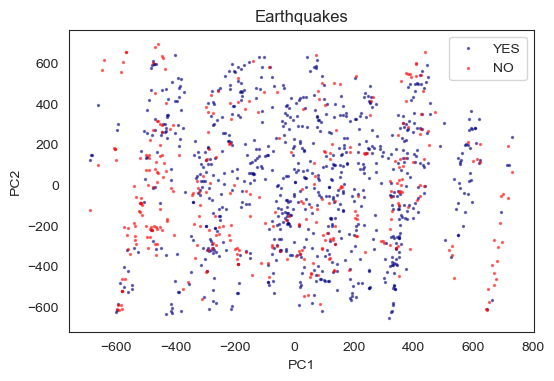

In [7]:
#PCA on first two components. This really shows nothing.

x_pca = damage_encoded.iloc[:,1:]
y_pca = damage_encoded.iloc[:,0]
pca = PCA(n_components=2).fit_transform(x_pca)
x_train, x_test, y_train, y_test = train_test_split(pca, y_pca, random_state=42)

plt.figure(dpi=100)
plt.scatter(pca[y_pca.values==0,0], pca[y_pca.values==0,1], alpha=0.5, label='YES', s=2, color='navy')
plt.scatter(pca[y_pca.values==1,0], pca[y_pca.values==1,1], alpha=0.5, label='NO', s=2, color='red')
plt.legend()
plt.title('Earthquakes')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [9]:
# Adding columns with normalized data

# damage["Depth_norm"]=((damage["Depth"]-damage["Depth"].min())/(damage["Depth"].max()-damage["Depth"].min()))*20
# damage["Deaths_norm"]=((damage["Deaths"]-damage["Deaths"].min())/(damage["Deaths"].max()-damage["Deaths"].min()))*20
# damage["Missing_norm"]=((damage["Missing"]-damage["Missing"].min())/(damage["Missing"].max()-damage["Missing"].min()))*20
# damage["Injuries_norm"]=((damage["Injuries"]-damage["Injuries"].min())/(damage["Injuries"].max()-damage["Injuries"].min()))*20
# damage["Damage_norm"]=((damage["Damage"]-damage["Damage"].min())/(damage["Damage"].max()-damage["Damage"].min()))*20
# damage["Houses Destroyed_norm"]=((damage["Houses Destroyed"]-damage["Houses Destroyed"].min())/(damage["Houses Destroyed"].max()-damage["Houses Destroyed"].min()))*20
# damage["Houses Damaged_norm"]=((damage["Houses Damaged"]-damage["Houses Damaged"].min())/(damage["Houses Damaged"].max()-damage["Houses Damaged"].min()))*20
# damage.head()

In [8]:
# Sorting dataframe by Magnitude, least to greatest
location = damage.groupby(['Name', 'Latitude', 'Longitude']).count()
# location = damage.sort_values(['Latitude'], ascending=True)
location.head()

Tsunami  \
Name                                               Latitude Longitude            
AFGHANISTAN                                        36.300   70.700           1   
                                                   37.000   71.000           1   
AFGHANISTAN: BADAKHSTAN PROVINCE                   37.457   68.273           1   
AFGHANISTAN: BADAKHSTAN, BAGHLAN, LAGHMAN, NAGA... 35.993   70.423           1   
AFGHANISTAN: HINDU KUSH                            36.500   70.500           1   

                                                                       Depth  \
Name                                               Latitude Longitude          
AFGHANISTAN                                        36.300   70.700         1   
                                                   37.000   71.000         1   
AFGHANISTAN: BADAKHSTAN PROVINCE                   37.457   68.273         1   
AFGHANISTAN: BADAKHSTAN, BAGHLAN, LAGHMAN, NAGA... 35.993   70.423         1   
AFGHANISTAN: HINDU KUSH                            36.500   70.500         1   

                                                                       Magnitude  \
Name                                               Latitude Longitude              
AFGHANISTAN                                        36.300   70.700             1   
                                                   37.000   71.000             1   
AFGHANISTAN: BADAKHSTAN PROVINCE                   37.457   68.273             1   
AFGHANISTAN: BADAKHSTAN, BAGHLAN, LAGHMAN, NAGA... 35.993   70.423             1   
AFGHANISTAN: HINDU KUSH                            36.500   70.500             1   

                                                                       Date  \
Name                                               Latitude Longitude         
AFGHANISTAN                                        36.300   70.700        1   
                                                   37.000   71.000        1   
AFGHANISTAN: BADAKHSTAN PROVINCE                   37.457   68.273        1   
AFGHANISTAN: BADAKHSTAN, BAGHLAN, LAGHMAN, NAGA... 35.993   70.423        1   
AFGHANISTAN: HINDU KUSH                            36.500   70.500        1   

                                                                       Deaths  \
Name                                               Latitude Longitude           
AFGHANISTAN                                        36.300   70.700          1   
                                                   37.000   71.000          1   
AFGHANISTAN: BADAKHSTAN PROVINCE                   37.457   68.273          1   
AFGHANISTAN: BADAKHSTAN, BAGHLAN, LAGHMAN, NAGA... 35.993   70.423          1   
AFGHANISTAN: HINDU KUSH                            36.500   70.500          1   

                                                                       Missing  \
Name                                               Latitude Longitude            
AFGHANISTAN                                        36.300   70.700           1   
                                                   37.000   71.000           1   
AFGHANISTAN: BADAKHSTAN PROVINCE                   37.457   68.273           1   
AFGHANISTAN: BADAKHSTAN, BAGHLAN, LAGHMAN, NAGA... 35.993   70.423           1   
AFGHANISTAN: HINDU KUSH                            36.500   70.500           1   

                                                                       Injuries  \
Name                                               Latitude Longitude             
AFGHANISTAN                                        36.300   70.700            1   
                                                   37.000   71.000            1   
AFGHANISTAN: BADAKHSTAN PROVINCE                   37.457   68.273            1   
AFGHANISTAN: BADAKHSTAN, BAGHLAN, LAGHMAN, NAGA... 35.993   70.423            1   
AFGHANISTAN: HINDU KUSH                            36.500   70.500            1   

                                                                   

In [9]:
location.shape

(1106, 10)

In [10]:
damage.describe()

,Tsunami,Latitude,Longitude,Depth,Magnitude,Deaths,Missing,Injuries,Damage,Houses Destroyed,Houses Damaged
count,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1.115000e+03,1.115000e+03,1.115000e+03
mean,0.310314,22.151187,27.395974,35.405381,6.585740,2038.663677,8.414350,2486.356054,7.851990e+06,9.025932e+03,7.575711e+03
std,0.462830,25.031921,93.707215,52.647917,1.028343,12521.401826,196.646044,28016.553848,9.957004e+06,1.645468e+05,1.643444e+05
min,0.000000,-53.500000,-177.886000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,5.318500,-71.500000,11.000000,5.900000,0.000000,0.000000,0.000000,5.000000e+05,0.000000e+00,0.000000e+00
50%,0.000000,34.100000,28.890000,24.000000,6.600000,50.000000,0.000000,0.000000,2.500000e+06,0.000000e+00,0.000000e+00
75%,1.000000,40.719500,115.412500,36.000000,7.500000,74.500000,0.000000,84.000000,1.250000e+07,1.000000e+02,0.000000e+00
max,1.000000,64.000000,179.146000,664.000000,9.500000,247769.000000,6309.000000,804000.000000,2.760000e+07,5.365000e+06,5.360004e+06


In [11]:
# Getting some statistics from the dataframe

damage_describe = damage.describe()
damage_describe = damage_describe.drop(['Tsunami', 'Latitude', 'Longitude'], axis=1)

In [12]:
damage_describe = damage_describe.T
# damage_describe.to_csv('damage_describe.csv')
damage_describe.head()

,count,mean,std,min,25%,50%,75%,max
Depth,1115.0,35.405381,52.647917,0.0,11.0,24.0,36.0,664.0
Magnitude,1115.0,6.585740,1.028343,4.0,5.9,6.6,7.5,9.5
Deaths,1115.0,2038.663677,12521.401826,0.0,0.0,50.0,74.5,247769.0
Missing,1115.0,8.414350,196.646044,0.0,0.0,0.0,0.0,6309.0
Injuries,1115.0,2486.356054,28016.553848,0.0,0.0,0.0,84.0,804000.0


In [13]:
# Does not make a very good plot

# import plotly.plotly as py
# from plotly.graph_objs import *
# py.sign_in('dlromanoff', '9sTMPd6l0kHW68sZ6Xx2')
# trace1 = {
#   "x": ["35.40538116591928", "6.585739910313902", "2038.6636771300448", "8.414349775784753", "2486.356053811659", "7851990.018282509", "9025.931838565022", "7575.711210762332"], 
#   "y": ["Depth", "Magnitude", "Deaths", "Missing", "Injuries", "Damage", "Houses Destroyed", "Houses Damaged"], 
#   "hoverinfo": "x+y+name", 
#   "hoveron": "points+fills", 
#   "mode": "markers", 
#   "name": "Mean", 
#   "type": "scatter", 
#   "xsrc": "dlromanoff:137:6c7697", 
#   "ysrc": "dlromanoff:137:8c5254"
# }
# trace2 = {
#   "x": ["52.64791736255961", "1.0283430680012753", "12521.401825651334", "196.6460438967806", "28016.553848107724", "9957003.707428172", "164546.82004268188", "164344.37921330956"], 
#   "y": ["Depth", "Magnitude", "Deaths", "Missing", "Injuries", "Damage", "Houses Destroyed", "Houses Damaged"], 
#   "hoveron": "points+fills", 
#   "mode": "markers", 
#   "name": "Standard Deviation", 
#   "type": "scatter", 
#   "xsrc": "dlromanoff:137:ae2557", 
#   "ysrc": "dlromanoff:137:8c5254"
# }
# trace3 = {
#   "x": [11.000000, 5.900000, 0.000000, 0.000000, 0.000000, 5.000000e+05, 0.000000e+00, 0.000000e+00], 
#   "y": ["Depth", "Magnitude", "Deaths", "Missing", "Injuries", "Damage", "Houses Destroyed", "Houses Damaged"], 
#   "hoverinfo": "x+y+name", 
#   "hoveron": "points+fills", 
#   "mode": "markers", 
#   "name": "First Quartile", 
#   "type": "scatter", 
#   "xsrc": "dlromanoff:137:6c7697", 
#   "ysrc": "dlromanoff:137:8c5254"
# }
# trace4 = {
#   "x": [3.57026906e+01, 6.59286996e+00, 5.94750000e+02, 4.20717489e+00,
#        5.99500000e+02, 5.17599501e+06, 6.07500000e+02, 5.57500000e+02], 
#   "y": ["Depth", "Magnitude", "Deaths", "Missing", "Injuries", "Damage", "Houses Destroyed", "Houses Damaged"], 
#   "hoverinfo": "x+y+name", 
#   "hoveron": "points+fills", 
#   "mode": "markers", 
#   "name": "Median", 
#   "type": "scatter", 
#   "xsrc": "dlromanoff:137:6c7697", 
#   "ysrc": "dlromanoff:137:8c5254"
# }
# trace5 = {
#   "x": [36.000000, 7.500000, 74.500000, 0.000000, 84.000000, 1.250000e+07, 1.000000e+02, 0.000000e+00], 
#   "y": ["Depth", "Magnitude", "Deaths", "Missing", "Injuries", "Damage", "Houses Destroyed", "Houses Damaged"], 
#   "hoverinfo": "x+y+name", 
#   "hoveron": "points+fills", 
#   "mode": "markers", 
#   "name": "Third Quartile", 
#   "type": "scatter", 
#   "xsrc": "dlromanoff:137:6c7697", 
#   "ysrc": "dlromanoff:137:8c5254"
# }

# data = Data([trace1, trace2, trace3, trace4, trace5])
# layout = {
#   "autosize": True, 
#   "font": {"color": "rgb(246, 247, 250)"}, 
#   "legend": {"bordercolor": "rgb(143, 141, 141)"}, 
#   "paper_bgcolor": "rgb(8, 7, 7)", 
#   "plot_bgcolor": "rgb(15, 15, 15)", 
#   "title": {
#     "x": 0.24, 
#     "text": "Basic Statistics of Damage Caused by Earthquakes"
#   }, 
#   "xaxis": {
#     "autorange": False, 
#     "exponentformat": "none", 
#     "range": [-171355.45067302947, 10586532.590230627], 
#     "rangeslider": {
#       "autorange": True, 
#       "bgcolor": "rgb(128, 125, 125)", 
#       "range": [-629527.8544593862, 10586532.590230627], 
#       "visible": True, 
#       "yaxis": {"rangemode": "match"}
#     }, 
#     "showgrid": False, 
#     "tickcolor": "rgb(247, 243, 243)", 
#     "tickformat": "", 
#     "tickprefix": "", 
#     "ticks": "inside", 
#     "title": {"text": "Important Statistics"}, 
#     "type": "linear", 
#     "zeroline": False
#   }, 
#   "yaxis": {
#     "autorange": True, 
#     "range": [-0.605419450631032, 7.605419450631032], 
#     "showgrid": False, 
#     "tickcolor": "rgb(245, 241, 241)", 
#     "ticks": "inside", 
#     "type": "category", 
#     "zeroline": False
#   }
# }
# fig = Figure(data=data, layout=layout)
# plot_url = py.plot(fig)

In [13]:
# Assigning variables X and Y to show how many Earthquakes there were that generated Tsunamis

X = damage.drop(['Name', 'Date'], axis=1)
Y = damage['Name']

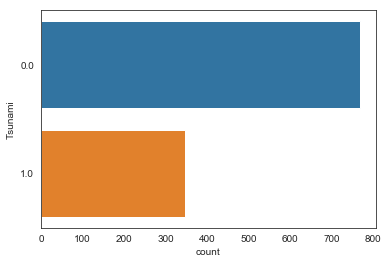

In [14]:
# Showing how many earthquakes caused a Tsunami

sns.countplot(y="Tsunami", data=X);

In [15]:
# Making a new dataframe grouping by Magnitude and summing the features

magnitude = copy_of_damage.groupby('Magnitude').sum()
# magnitude.to_csv('magnitude.csv', index=False)
magnitude.head()

,Tsunami,Latitude,Longitude,Depth,Deaths,Missing,Injuries,Damage,Houses Destroyed,Houses Damaged
Magnitude,,,,,,,,,,
4.0,0.0,78.770,-41.180,6.0,0.0,0.0,0.0,3000000.0,0.0,0.0
4.1,0.0,83.363,84.567,49.0,0.0,0.0,0.0,3500000.0,0.0,0.0
4.2,0.0,75.859,-73.187,12.0,0.0,0.0,0.0,3000000.0,0.0,0.0
4.3,0.0,200.770,158.667,24.0,0.0,0.0,59.0,8000000.0,0.0,100.0
4.4,0.0,128.364,294.775,118.0,53.0,0.0,71.0,33500035.0,50.0,569.0


In [16]:
# Making a new dataframe grouping by Magnitude and displaying the mean of the features.

magnitude_mean = copy_of_damage.groupby('Magnitude').mean()
# magnitude_mean.to_csv('magnitude_mean.csv', index=False)
magnitude_mean.head()

,Tsunami,Latitude,Longitude,Depth,Deaths,Missing,Injuries,Damage,Houses Destroyed,Houses Damaged
Magnitude,,,,,,,,,,
4.0,0.0,39.385000,-20.5900,3.000000,0.0,0.0,0.0,1.500000e+06,0.0,0.0
4.1,0.0,27.787667,28.1890,16.333333,0.0,0.0,0.0,1.166667e+06,0.0,0.0
4.2,0.0,37.929500,-36.5935,6.000000,0.0,0.0,0.0,1.500000e+06,0.0,0.0
4.3,0.0,40.154000,31.7334,4.800000,0.0,0.0,11.8,1.600000e+06,0.0,20.0
4.4,0.0,25.672800,58.9550,23.600000,10.6,0.0,14.2,6.700007e+06,10.0,113.8


In [17]:
magnitude_cost = copy_of_damage.groupby('Magnitude')['Damage'].sum()
# magnitude_mean.to_csv('magnitude_mean.csv', index=False)
magnitude_cost.values

array([3.00000000e+06, 3.50000000e+06, 3.00000000e+06, 8.00000000e+06,
       3.35000350e+07, 2.45000000e+07, 6.20000685e+07, 1.30000005e+07,
       4.85000524e+07, 5.60004109e+07, 1.27500125e+08, 9.05000553e+07,
       7.15001000e+07, 1.46000706e+08, 1.18001031e+08, 9.00000253e+07,
       1.45000114e+08, 1.68500669e+08, 1.33000187e+08, 1.62000358e+08,
       4.36011965e+08, 3.35001024e+08, 3.37005494e+08, 1.85000591e+08,
       3.04501647e+08, 3.16505373e+08, 3.58002310e+08, 2.82041176e+08,
       3.62523764e+08, 3.92630268e+08, 3.43028552e+08, 1.93500483e+08,
       1.79501178e+08, 3.03007634e+08, 1.97000136e+08, 4.55009298e+08,
       2.99028154e+08, 5.23025781e+08, 3.06014327e+08, 2.39587020e+08,
       2.40001661e+08, 1.40504045e+08, 1.11500200e+08, 1.86001550e+08,
       5.50000000e+07, 4.30000000e+07, 1.55000200e+07, 2.55000000e+07,
       2.80300000e+07, 0.00000000e+00, 2.75002840e+07, 2.75010000e+07])

In [18]:
magnitude_cost.index.values

array([4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 9. , 9.2, 9.5])

In [66]:
import plotly.plotly as py
from plotly.graph_objs import *
py.sign_in('dlromanoff', '9sTMPd6l0kHW68sZ6Xx2')
trace1 = {
  "x": [4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 9. , 9.2, 9.5],
  "y": [3.00000000e+06, 3.50000000e+06, 3.00000000e+06, 8.00000000e+06,
       3.35000350e+07, 2.45000000e+07, 6.20000685e+07, 1.30000005e+07,
       4.85000524e+07, 5.60004109e+07, 1.27500125e+08, 9.05000553e+07,
       7.15001000e+07, 1.46000706e+08, 1.18001031e+08, 9.00000253e+07,
       1.45000114e+08, 1.68500669e+08, 1.33000187e+08, 1.62000358e+08,
       4.36011965e+08, 3.35001024e+08, 3.37005494e+08, 1.85000591e+08,
       3.04501647e+08, 3.16505373e+08, 3.58002310e+08, 2.82041176e+08,
       3.62523764e+08, 3.92630268e+08, 3.43028552e+08, 1.93500483e+08,
       1.79501178e+08, 3.03007634e+08, 1.97000136e+08, 4.55009298e+08,
       2.99028154e+08, 5.23025781e+08, 3.06014327e+08, 2.39587020e+08,
       2.40001661e+08, 1.40504045e+08, 1.11500200e+08, 1.86001550e+08,
       5.50000000e+07, 4.30000000e+07, 1.55000200e+07, 2.55000000e+07,
       2.80300000e+07, 0.00000000e+00, 2.75002840e+07, 2.75010000e+07],
    "connectgaps": True, 
  "fill": "tonexty", 
  "fillcolor": "rgb(172, 212, 51)", 
  "line": {
    "color": "rgb(43, 50, 25)", 
    "width": 1
  }, 
  "marker": {
    "color": [3000000.0, 3500000.0, 3000000.0, 8000000.0, 33500035.0, 24500000.0, 62000068.5, 13000000.5, 48500052.4, 56000410.9, 127500125.0, 90500055.3, 71500100.0, 146000706.0, 118001031.0, 90000025.3, 145000114.0, 168500669.0, 133000187.0, 162000358.0, 436011965.0, 335001024.0, 337005494.0, 185000591.0, 304501647.0, 316505373.0, 358002310.0, 282041176.0, 362523764.0, 392630268.0, 343028552.0, 193500483.0, 179501178.0, 303007634.0, 197000136.0, 455009298.0, 299028154.0, 523025781.0, 306014327.0, 239587020.0, 240001661.0, 140504045.0, 111500200.0, 186001550.0, 55000000.0, 43000000.0, 15500020.0, 25500000.0, 28030000.0, 0.0, 27500284.0, 27501000.0], 
    "colorscale": [
      [0, "#0d0887"], [0.1111111111111111, "#46039f"], [0.2222222222222222, "#7201a8"], [0.3333333333333333, "#9c179e"], [0.4444444444444444, "#bd3786"], [0.5555555555555556, "#d8576b"], [0.6666666666666666, "#ed7953"], [0.7777777777777778, "#fb9f3a"], [0.8888888888888888, "#fdca26"], [1, "#f0f921], 
    "colorsrc": "dlromanoff:144:bd0601"
  }, 
  "mode": "markers+lines", 
  "name": "Magnitude", 
  "type": "scatter", 
  "uid": "4e85734e-e920-4e15-84fb-b493ef2416c3", 
  "xsrc": "dlromanoff:144:20f268", 
  "ysrc": "dlromanoff:144:bd0601"
}
data = Data([trace1])
layout = {
  "autosize": False, 
  "bargap": 0.2, 
  "bargroupgap": 0, 
  "barmode": "group", 
  "boxgap": 0.3, 
  "boxgroupgap": 0.3, 
  "boxmode": "overlay", 
  "dragmode": "zoom", 
  "font": {
    "color": "rgb(255, 255, 255)", 
    "family": "\"Open sans\", verdana, arial, sans-serif", 
    "size": 12
  }, 
  "height": 600, 
  "hidesources": True, 
  "hovermode": "x", 
  "legend": {
    "x": 1.02, 
    "y": 1, 
    "bgcolor": "#fff", 
    "bordercolor": "#444", 
    "borderwidth": 0, 
    "font": {
      "color": "black", 
      "family": "arial", 
      "size": 10
    }, 
    "traceorder": "reversed", 
    "xanchor": "left", 
    "yanchor": "top"
  }, 
  "margin": {
    "r": 80, 
    "t": 100, 
    "autoexpand": True, 
    "b": 80, 
    "l": 80, 
    "pad": 0
  }, 
  "paper_bgcolor": "rgb(31, 119, 180)", 
  "plot_bgcolor": "rgb(31, 119, 180)", 
  "separators": ".,", 
  "showlegend": False, 
  "title": {
    "font": {
      "size": 24, 
      "color": "black", 
      "family": "arial"
    }, 
    "text": "Cost of Damage Caused by Earthquakes"
  }, 
  "width": 800, 
  "xaxis": {
    "anchor": "y", 
    "automargin": False, 
    "autorange": True, 
    "domain": [0, 1], 
    "dtick": 3, 
    "exponentformat": "B", 
    "gridcolor": "rgb(255, 255, 255)", 
    "gridwidth": 1, 
    "linecolor": "#444", 
    "linewidth": 1, 
    "mirror": False, 
    "nticks": 10, 
    "position": 0, 
    "range": [0, 51], 
    "rangemode": "normal", 
    "showexponent": "all", 
    "showgrid": False, 
    "showline": False, 
    "showticklabels": True, 
    "tick0": 0, 
    "tickangle": "auto", 
    "tickcolor": "rgb(255, 255, 255)", 
    "tickfont": {
      "color": "black", 
      "family": "arial", 
      "size": 14
    }, 
    "ticklen": 5, 
    "ticks": "", 
    "tickwidth": 1, 
    "title": {
      "font": {
        "size": 22, 
        "color": "black", 
        "family": "arial"
      }, 
      "text": "Magnitude"
    }, 
    "type": "category", 
    "zeroline": False, 
    "zerolinecolor": "#444", 
    "zerolinewidth": 1
  }, 
  "yaxis": {
    "anchor": "x", 
    "automargin": False, 
    "autorange": False, 
    "domain": [0, 1], 
    "dtick": 200000, 
    "exponentformat": "B", 
    "gridcolor": "rgb(255, 255, 255)", 
    "gridwidth": 1, 
    "linecolor": "#444", 
    "linewidth": 1, 
    "mirror": False, 
    "nticks": 11, 
    "position": 0, 
    "range": [0, 550553453.6842105], 
    "rangemode": "normal", 
    "separatethousands": True, 
    "showexponent": "all", 
    "showgrid": False, 
    "showline": False, 
    "showticklabels": True, 
    "side": "left", 
    "tick0": 10, 
    "tickangle": 0, 
    "tickcolor": "rgb(255, 255, 255)", 
    "tickfont": {
      "color": "black", 
      "family": "arial", 
      "size": 14
    }, 
    "ticklen": 5, 
    "tickmode": "auto", 
    "ticks": "", 
    "tickwidth": 1, 
    "title": {
      "font": {
        "size": 22, 
        "color": "black", 
        "family": "arial"
      }, 
      "text": "Cost"
    }, 
    "type": "linear", 
    "zeroline": False, 
    "zerolinecolor": "#444", 
    "zerolinewidth": 1
  }
}
fig = Figure(data=data, layout=layout)
plot_url = py.plot(fig)

In [19]:
# Creating a new dataframe for Earthquakes that generated a Tsunami
with_tsu = magnitude_mean[magnitude_mean.Tsunami == 1]

# with_tsu.to_csv('with_tsu.csv', index=False)
with_tsu.head()

,Tsunami,Latitude,Longitude,Depth,Deaths,Missing,Injuries,Damage,Houses Destroyed,Houses Damaged
Magnitude,,,,,,,,,,
8.4,1.0,18.3470,20.271800,33.600000,435.4,33.6,1542.6,11000000.0,5679.800000,0.0
8.5,1.0,2.9175,24.949500,34.500000,10250.0,0.0,0.0,10750000.0,0.000000,0.0
8.7,1.0,9.5790,76.598333,34.666667,500.0,0.0,0.0,8500000.0,666.666667,0.0
9.0,1.0,52.7550,160.057000,22.000000,50.0,0.0,0.0,0.0,0.000000,0.0
9.2,1.0,61.0170,-147.648000,33.000000,65.0,0.0,0.0,27500284.0,1000.000000,0.0


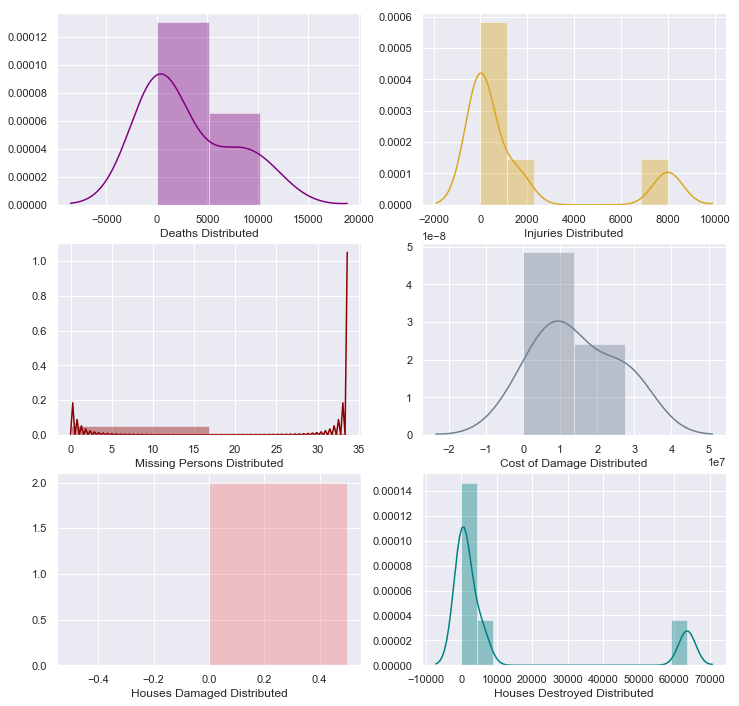

In [20]:
# Distribution plots for each feature.

sns.set(style='darkgrid')

f, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=False)
sns.distplot(a = with_tsu.Deaths, bins= None, hist=True, kde=True, color = 'purple',  axlabel='Deaths Distributed', ax=axes[0, 0]);
sns.distplot(a = with_tsu.Injuries, bins= None, hist=True, kde=True, color = 'goldenrod',  axlabel='Injuries Distributed', ax=axes[0, 1]);
sns.distplot(a = with_tsu.Missing, bins= None, hist=True, kde=True, color = 'darkred', axlabel='Missing Persons Distributed', ax=axes[1, 0]);
sns.distplot(a = with_tsu.Damage, bins= None, hist=True, kde=True, color = 'slategrey', axlabel='Cost of Damage Distributed', ax=axes[1, 1]);
sns.distplot(a = with_tsu['Houses Destroyed'], bins= None, hist=True, kde=True, color = 'teal', axlabel='Houses Destroyed Distributed', ax=axes[2, 1]);
sns.distplot(a = with_tsu['Houses Damaged'], bins= None, hist=True, kde=True, color = 'lightcoral', axlabel='Houses Damaged Distributed', ax=axes[2, 0]);

In [21]:
# Creating a dataframe for Earthquakes that did not generate a Tsunami

without_tsu = magnitude_mean[magnitude_mean.Tsunami == 0]
# without_tsu.to_csv('without_tsu.csv', index=False)
without_tsu.describe()

,Tsunami,Latitude,Longitude,Depth,Deaths,Missing,Injuries,Damage,Houses Destroyed,Houses Damaged
count,12.0,12.000000,12.000000,12.000000,12.000000,12.0,12.000000,1.200000e+01,12.000000,12.000000
mean,0.0,30.120237,12.861250,13.852773,94.737225,0.0,155.569269,3.614590e+06,1367.925357,59.861898
std,0.0,6.613579,29.111176,6.218141,174.572123,0.0,222.143835,2.300641e+06,2366.487821,89.290291
min,0.0,20.328842,-36.593500,3.000000,0.000000,0.0,0.000000,1.166667e+06,0.000000,0.000000
25%,0.0,26.337608,-8.955924,11.423077,0.000000,0.0,8.850000,1.500000e+06,0.000000,0.000000
50%,0.0,29.039918,19.091250,15.666667,16.852632,0.0,33.115789,3.317311e+06,122.131579,22.894737
75%,0.0,33.898913,33.160563,17.273214,63.046053,0.0,225.957707,5.675044e+06,1359.861951,102.884615
max,0.0,40.154000,58.955000,23.600000,550.642857,0.0,653.500000,6.710533e+06,6058.550000,305.357143


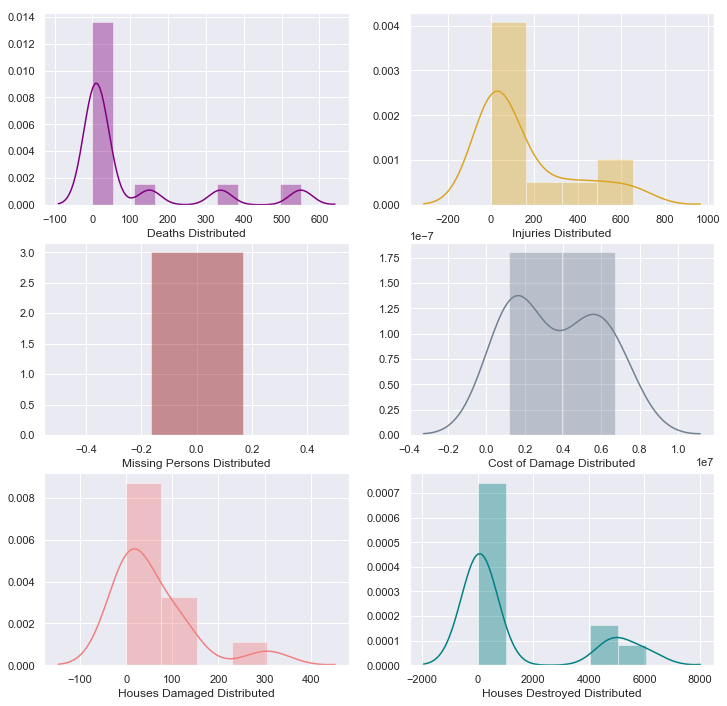

In [22]:
# Distribution plots for each feature.

sns.set(style='darkgrid')

f, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=False)
sns.distplot(a = without_tsu.Deaths, bins= None, hist=True, kde=True, color = 'purple',  axlabel='Deaths Distributed', ax=axes[0, 0]);
sns.distplot(a = without_tsu.Injuries, bins= None, hist=True, kde=True, color = 'goldenrod',  axlabel='Injuries Distributed', ax=axes[0, 1]);
sns.distplot(a = without_tsu.Missing, bins= None, hist=True, kde=True, color = 'darkred', axlabel='Missing Persons Distributed', ax=axes[1, 0]);
sns.distplot(a = without_tsu.Damage, bins= None, hist=True, kde=True, color = 'slategrey', axlabel='Cost of Damage Distributed', ax=axes[1, 1]);
sns.distplot(a = without_tsu['Houses Destroyed'], bins= None, hist=True, kde=True, color = 'teal', axlabel='Houses Destroyed Distributed', ax=axes[2, 1]);
sns.distplot(a = without_tsu['Houses Damaged'], bins= None, hist=True, kde=True, color = 'lightcoral', axlabel='Houses Damaged Distributed', ax=axes[2, 0]);

In [23]:
copy_of_damage.head()

,Tsunami,Name,Latitude,Longitude,Depth,Magnitude,Date,Deaths,Missing,Injuries,Damage,Houses Destroyed,Houses Damaged
0,1.0,"PERU: LIMA,SALINAS-HUAURA,LIMA,CALLAO,CHANCAY",-9.0,-79.0,40.0,8.4,1678-06-18,1000.0,0.0,0.0,12500000.0,1000.0,0.0
1,1.0,PERU: LIMA,-13.5,-76.5,30.0,8.5,1687-10-20,10000.0,0.0,0.0,12500000.0,0.0,0.0
2,0.0,RUSSIA: TERSK,43.7,44.7,15.0,5.3,1688-01-01,0.0,0.0,0.0,2500000.0,0.0,0.0
3,0.0,ECUADOR: TIXAN,-2.2,-78.9,5.0,6.8,1689-03-01,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,BALKANS NW: SLOVENIA: LJUBLJANA,45.6,15.3,6.0,5.0,1699-02-11,100.0,0.0,0.0,12500000.0,0.0,0.0


In [24]:
copy_of_damage['Deaths'].max()

247769.0

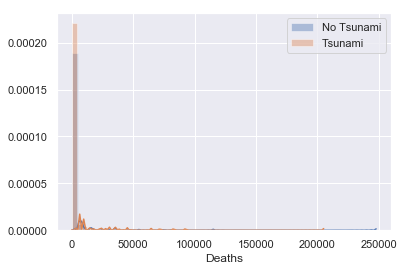

In [25]:
df= copy_of_damage.copy()
bins = None # list(range(0, 300000, 300000))
sns.distplot(df.loc[df['Tsunami']==0, 'Deaths'], bins=bins, kde=True, label='No Tsunami');
sns.distplot(df.loc[df['Tsunami']==1, 'Deaths'], bins=bins, kde=True, label='Tsunami');
plt.legend();

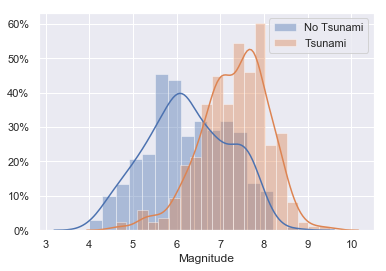

In [26]:
df= copy_of_damage.copy()

for label in ['Magnitude']:
    fig, ax = plt.subplots()
    bins = None # list(range(0, 300000, 300000))
    sns.distplot(df.loc[df['Tsunami']==0, label], ax=ax, bins=bins, kde=True, label='No Tsunami');
    sns.distplot(df.loc[df['Tsunami']==1, label], ax=ax, bins=bins, kde=True, label='Tsunami');
    
    ax.set_yticklabels([f"{x}%" for x in range(0, 70, 10)])
    plt.title('')
    plt.legend()
    plt.savefig('test_figure.jpeg')
#     plt.show();

In [27]:
stats.ttest_ind(df.loc[df['Tsunami']==0, 'Deaths'], 
                df.loc[df['Tsunami']==1, 'Deaths'])

Ttest_indResult(statistic=-1.7025955680714973, pvalue=0.0889229983578646)

In [28]:
with_tsu['Deaths'].values

array([  435.4, 10250. ,   500. ,    50. ,    65. ,  7000. ])

In [172]:
# Plot for means when a Tsunami is generated.

import plotly.plotly as py
from plotly.graph_objs import *
py.sign_in('dlromanoff', '9sTMPd6l0kHW68sZ6Xx2')
trace1 = {
  "x": [4.6, 4.8, 5.7, 8.8, 9.0, 9.2, 9.5], 
  "y": [435.4, 10250.0, 500.0, 50.0, 65.0, 7000.0], 
  "hoverinfo": "y+name", 
  "hoveron": "points+fills", 
  "marker": {"size": 9}, 
  "mode": "markers+lines", 
  "name": "Deaths", 
  "showlegend": True, 
  "type": "scatter", 
  "uid": "11bad2ea-33e9-4292-a916-60dd9394420a", 
  "xsrc": "dlromanoff:132:ed07f0", 
  "ysrc": "dlromanoff:132:b94096"
}
trace2 = {
  "x": [4.6, 4.8, 5.7, 8.8, 9.0, 9.2, 9.5], 
  "y": [33.6, 0.0, 0.0, 0.0, 0.0, 0.0], 
  "cliponaxis": True, 
  "hoverinfo": "y+name", 
  "marker": {"size": 9}, 
  "mode": "markers+lines", 
  "name": "Missing", 
  "type": "scatter", 
  "uid": "3c6f105b-cf75-4510-977b-a7702fb789eb", 
  "xsrc": "dlromanoff:132:ed07f0", 
  "ysrc": "dlromanoff:132:bf06ab"
}
trace3 = {
  "x": [4.6, 4.8, 5.7, 8.8, 9.0, 9.2, 9.5], 
  "y": [1542.6, 0.0, 0.0, 0.0, 0.0, 8000.0], 
  "hoverinfo": "y+name", 
  "hoveron": "points+fills", 
  "marker": {"size": 9}, 
  "mode": "markers+lines", 
  "name": "Injuries", 
  "type": "scatter", 
  "uid": "602e856c-9119-4ab9-be2f-45455c4c2fd1", 
  "xsrc": "dlromanoff:132:ed07f0", 
  "ysrc": "dlromanoff:132:c7123e"
}
trace4 = {
  "x": [4.6, 4.8, 5.7, 8.8, 9.0, 9.2, 9.5], 
  "y": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 
  "hoverinfo": "y+name", 
  "hoveron": "points+fills", 
  "marker": {"size": 9}, 
  "mode": "markers+lines", 
  "name": "Houses Damaged", 
  "type": "scatter", 
  "uid": "eb04afef-5041-439d-adb5-80384bc6c004", 
  "xsrc": "dlromanoff:132:ed07f0", 
  "ysrc": "dlromanoff:132:f1e213"
}
trace5 = {
  "x": [4.6, 4.8, 5.7, 8.8, 9.0, 9.2, 9.5], 
  "y": [5679.8, 0.0, 666.66666667, 0.0, 1000.0, 63622.0], 
  "hoverinfo": "y+name", 
  "hoverlabel": {"namelength": 10}, 
  "hoveron": "points+fills", 
  "line": {"shape": "linear"}, 
  "marker": {"size": 9}, 
  "mode": "markers+lines", 
  "name": "Houses Destroyed", 
  "text": ["7090.0", "0.0", "84064.0", "0.0", "0.0", "1000.0", "63622.0"], 
  "textsrc": "dlromanoff:132:b9198c", 
  "type": "scatter", 
  "uid": "49ac8254-3057-462a-b561-772c16e065db", 
  "xsrc": "dlromanoff:132:ed07f0", 
  "ysrc": "dlromanoff:132:139191"
}
data = Data([trace1, trace2, trace3, trace4, trace5])
layout = {
  "autosize": True, 
  "plot_bgcolor": "rgb(13, 13, 13)", 
  "showlegend": True, 
  "title": {
    "x": 0.28, 
    "text": "Earthquake Damage with Associated Tsunami"
  }, 
  "xaxis": {
    "autorange": True, 
    "range": [-0.3282828282828283, 5.328282828282829], 
    "separatethousands": False, 
    "showline": False, 
    "tickfont": {"family": "Arial"}, 
    "title": {"text": "Magnitude"}, 
    "type": "category"
  }, 
  "yaxis": {
    "autorange": True, 
    "range": [-5237.13530293299, 68859.13530293299], 
    "title": {"text": "Mean"}, 
    "type": "linear"
  }
}
fig = Figure(data=data, layout=layout)
plot_url = py.plot(fig)

In [166]:
# Plot for means by feature when a Tsunami does not occur

import plotly.plotly as py
from plotly.graph_objs import *
py.sign_in('dlromanoff', '9sTMPd6l0kHW68sZ6Xx2')
trace1 = {
  "x": [4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.7, 4.9, 5.0, 5.1, 5.4, 5.8], 
  "y": [0.0, 0.0, 0.0, 0.0, 10.6, 4.15384615, 25.4, 150.5, 23.10526316, 33.89473684, 338.55, 550.64285714], 
  "hoverinfo": "y+name", 
  "hoveron": "points+fills", 
  "marker": {"size": 9}, 
  "mode": "markers+lines", 
  "name": "Deaths", 
  "showlegend": True, 
  "type": "scatter", 
  "uid": "a7b19856-262b-4eff-8265-c7bc2dab81bb", 
  "xsrc": "dlromanoff:134:db5d99", 
  "ysrc": "dlromanoff:134:22f328"
}
trace2 = {
  "x": [4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.7, 4.9, 5.0, 5.1, 5.4, 5.8], 
  "y": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 
  "cliponaxis": True, 
  "hoverinfo": "y+name", 
  "marker": {"size": 9}, 
  "mode": "markers+lines", 
  "name": "Missing", 
  "type": "scatter", 
  "uid": "4ac65bb2-bc9d-41c2-b27b-4aa3158023d1", 
  "xsrc": "dlromanoff:134:db5d99", 
  "ysrc": "dlromanoff:134:9c4a46"
}
trace3 = {
  "x": [4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.7, 4.9, 5.0, 5.1, 5.4, 5.8], 
  "y": [0.0, 0.0, 0.0, 11.8, 14.2, 100.38461538, 27.6, 653.5, 38.63157895, 187.15789474, 491.2, 342.35714286], 
  "hoverinfo": "y+name", 
  "hoveron": "points+fills", 
  "marker": {"size": 9}, 
  "mode": "markers+lines", 
  "name": "Injuries", 
  "type": "scatter", 
  "uid": "ac8e37e5-cc70-4130-83fa-fc31d7f9fcbe", 
  "xsrc": "dlromanoff:134:db5d99", 
  "ysrc": "dlromanoff:134:a6b1ab"
}
trace4 = {
  "x": [4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.7, 4.9, 5.0, 5.1, 5.4, 5.8], 
  "y": [0.0, 0.0, 0.0, 20.0, 113.8, 99.84615385, 15.0, 0.0, 25.78947368, 112.0, 26.55, 305.35714286], 
  "hoverinfo": "y+name", 
  "hoveron": "points+fills", 
  "marker": {"size": 9}, 
  "mode": "markers+lines", 
  "name": "Houses Damaged", 
  "type": "scatter", 
  "uid": "2e632885-4694-4b30-810f-d451ba60a7f0", 
  "xsrc": "dlromanoff:134:db5d99", 
  "ysrc": "dlromanoff:134:a59dad"
}
trace5 = {
  "x": [4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.7, 4.9, 5.0, 5.1, 5.4, 5.8], 
  "y": [0.0, 0.0, 0.0, 0.0, 10.0, 204.92307692, 100.0, 4895.9, 144.26315789, 176.78947368, 6058.55, 4824.67857143], 
  "hoverinfo": "y+name", 
  "hoverlabel": {"namelength": 10}, 
  "hoveron": "points+fills", 
  "line": {"shape": "linear"}, 
  "marker": {"size": 9}, 
  "mode": "markers+lines", 
  "name": "Houses Destroyed", 
  "text": ["7090.0", "0.0", "84064.0", "0.0", "0.0", "1000.0", "63622.0"], 
  "textsrc": "dlromanoff:134:60b386", 
  "type": "scatter", 
  "uid": "8faf31ee-407c-4965-ad62-5b14cd4ac23b", 
  "xsrc": "dlromanoff:134:db5d99", 
  "ysrc": "dlromanoff:134:a90fcd"
}
data = Data([trace1, trace2, trace3, trace4, trace5])
layout = {
  "autosize": True, 
  "plot_bgcolor": "rgb(10, 10, 10)", 
  "showlegend": True, 
  "title": {
    "x": 0.28, 
    "text": "Earthquake Damage with no Associated Tsunami"
  }, 
  "xaxis": {
    "autorange": True, 
    "range": [-0.7222222222222222, 11.722222222222221], 
    "separatethousands": False, 
    "showline": False, 
    "tickfont": {"family": "Arial"}, 
    "title": {"text": "Magnitude"}, 
    "type": "category"
  }, 
  "yaxis": {
    "autorange": True, 
    "range": [-498.71814921858277, 6557.268149218583], 
    "showline": False, 
    "title": {"text": "Mean of each Feature"}, 
    "type": "linear"
  }
}
fig = Figure(data=data, layout=layout)
plot_url = py.plot(fig)

/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




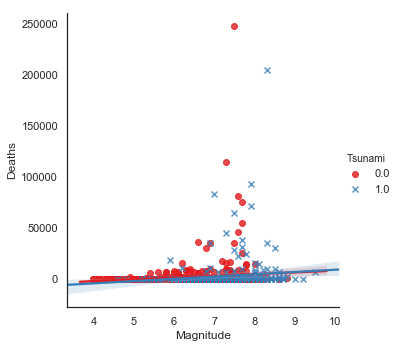

In [213]:
# Looking for a relationship between Magnitude and Deaths as related to Tsunamis

sns.lmplot(x="Magnitude", y="Deaths", hue = 'Tsunami', data=damage, markers=["o", "x"], palette="Set1");

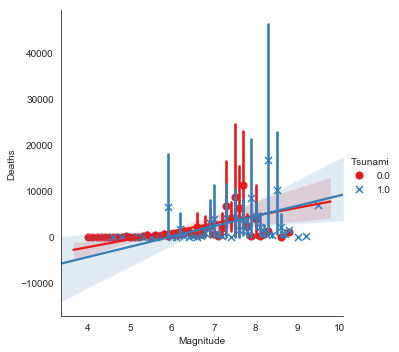

In [42]:
# Showing the same graph as above with a mean at each magnitude shown

regression_deaths = sns.lmplot(x="Magnitude", y="Deaths", hue = 'Tsunami', data=damage, x_estimator=np.mean, markers=["o", "x"], palette="Set1");
regression_deaths.savefig('regression_deaths.jpeg')

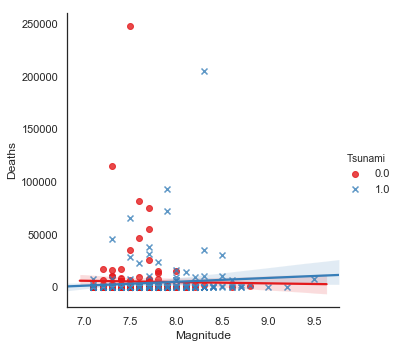

In [215]:
# Relationship between Magnitude and Deaths as related to Tsunamis with a magnitude over 7

sns.lmplot(x="Magnitude", y="Deaths", hue ='Tsunami', data=damage[damage['Magnitude'] > 7], markers=["o", "x"], palette="Set1");

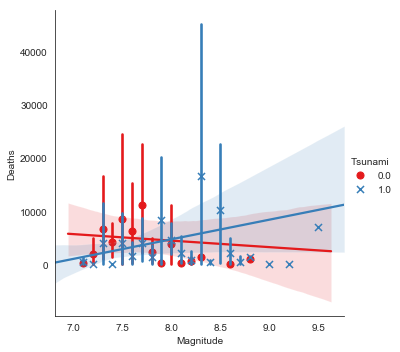

In [43]:
# Showing the same graph as above with a mean at each magnitude shown

regression_deaths_greater = sns.lmplot(x="Magnitude", y="Deaths", hue ='Tsunami', data=damage[damage['Magnitude'] > 7], x_estimator=np.mean, markers=["o", "x"], palette="Set1");
regression_deaths_greater.savefig('regression_deaths_greater.jpeg')

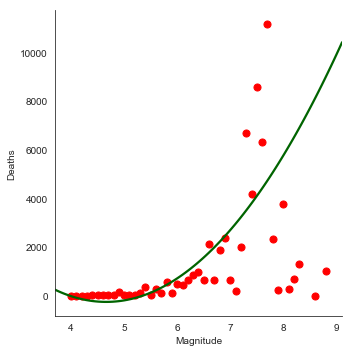

In [56]:
# Separate plot of Magnitude related to Deaths when there is no Tsunami

curved_without_tsunami = sns.lmplot(x="Magnitude", y="Deaths", data=damage.query("Tsunami == 0"), x_estimator=np.mean,
           order=2, ci=None, scatter_kws={"color": "red"}, line_kws={"color": "darkgreen"});
curved_without_tsunami.savefig('curved_without_tsunami.jpeg')


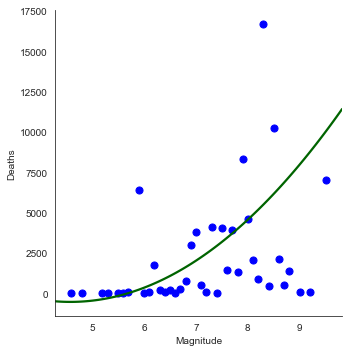

In [58]:
# Separate plot of Magnitude related to Deaths when there is a Tsunami

curved_with_tsunami = sns.lmplot(x="Magnitude", y="Deaths", data=damage.query("Tsunami == 1"), x_estimator=np.mean,
           order=2, ci=None, scatter_kws={"color": "blue"}, line_kws={"color": "darkgreen"});
curved_with_tsunami.savefig('curved_with_tsunami.jpeg')

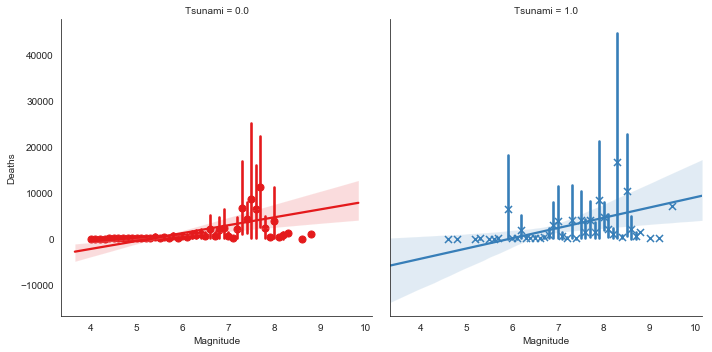

In [59]:
# Plot just to show Magnitude related to Deaths with and without a Tsunami generated

deaths = sns.lmplot(x="Magnitude", y="Deaths", hue="Tsunami", col="Tsunami", data=damage, x_estimator=np.mean, markers=["o", "x"], palette="Set1");
deaths.savefig('deaths.jpeg')

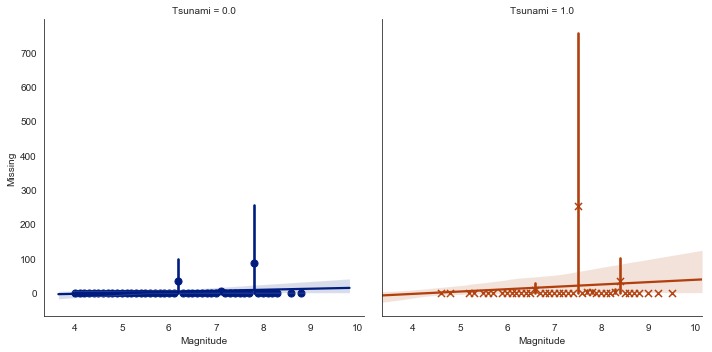

In [60]:
# Plot just to show Magnitude related to Missing with and without a Tsunami generated

missing = sns.lmplot(x="Magnitude", y="Missing", hue="Tsunami", col="Tsunami", data=damage, x_estimator=np.mean, markers=["o", "x"], palette="dark");
missing.savefig('missing.jpeg')

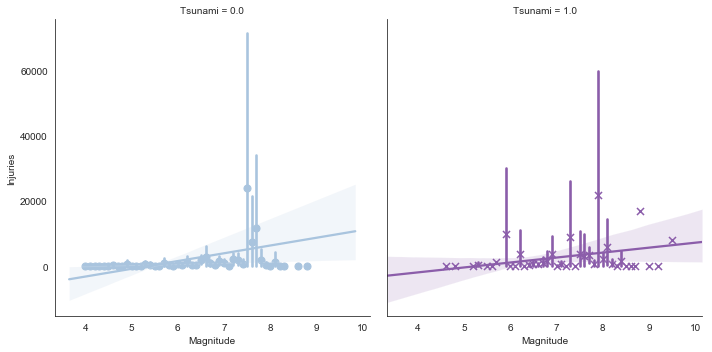

In [61]:
# Plot just to show Magnitude related to Deaths with and without a Tsunami generated

injuries = sns.lmplot(x="Magnitude", y="Injuries", hue="Tsunami", col="Tsunami", data=damage,  x_estimator=np.mean, markers=["o", "x"], palette="BuPu");
injuries.savefig('injuries.jpeg')

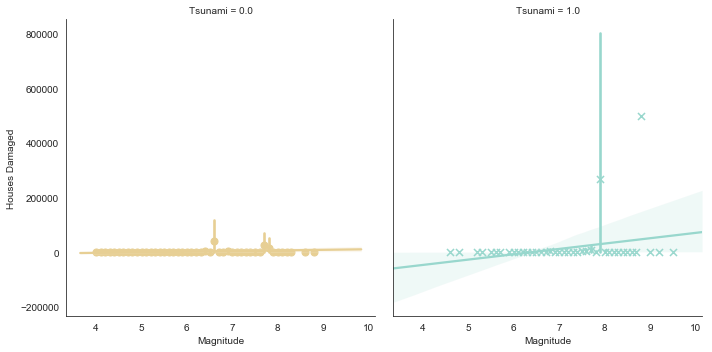

In [62]:
# Plot just to show Magnitude related to Deaths with and without a Tsunami generated

houses_damaged = sns.lmplot(x="Magnitude", y="Houses Damaged", hue="Tsunami", col="Tsunami", data=damage,  x_estimator=np.mean, markers=["o", "x"], palette="BrBG");
houses_damaged.savefig('houses_damaged.jpeg')

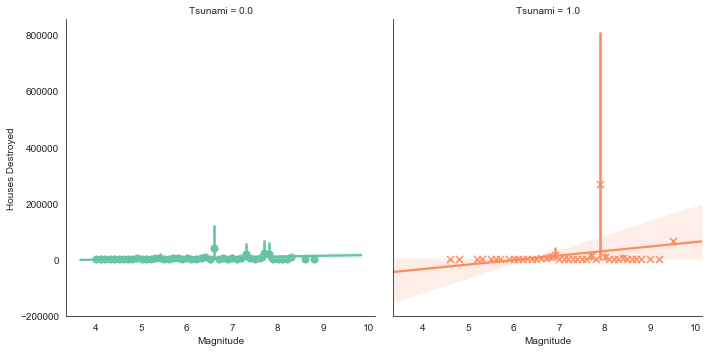

In [63]:
# Plot just to show Magnitude related to Deaths with and without a Tsunami generated

houses_destroyed = sns.lmplot(x="Magnitude", y="Houses Destroyed", hue="Tsunami", col="Tsunami", data=damage,  x_estimator=np.mean, markers=["o", "x"], palette="Set2");
houses_destroyed.savefig('houses_destroyed.jpeg')

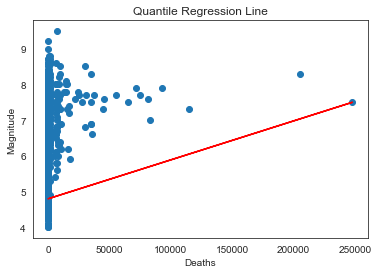

In [92]:
# Quantile regression plot focused on m

deaths = damage[['Magnitude', 'Deaths']]
quant_formula = 'Magnitude ~ ' + ' + '.join(deaths.drop('Magnitude', axis='columns').columns)

quant_mod = smf.quantreg(quant_formula, data=deaths)
quant_reg = quant_mod.fit(q=.0566)

x = deaths['Deaths']
y = deaths['Magnitude']
y_pred = quant_reg.predict(x)

plt.scatter(x,y)
plt.plot(x, y_pred, color = 'red')
plt.xlabel('Deaths')
plt.ylabel('Magnitude')
plt.title('Quantile Regression Line')

plt.show()

In [29]:
# Creating a dataframe grouping by Magnitude and Tsunami

mag_tsu = copy_of_damage.groupby(['Magnitude', 'Tsunami']).mean()
mag_tsu.head()

,,Latitude,Longitude,Depth,Deaths,Missing,Injuries,Damage,Houses Destroyed,Houses Damaged
Magnitude,Tsunami,,,,,,,,,
4.0,0.0,39.385000,-20.5900,3.000000,0.0,0.0,0.0,1.500000e+06,0.0,0.0
4.1,0.0,27.787667,28.1890,16.333333,0.0,0.0,0.0,1.166667e+06,0.0,0.0
4.2,0.0,37.929500,-36.5935,6.000000,0.0,0.0,0.0,1.500000e+06,0.0,0.0
4.3,0.0,40.154000,31.7334,4.800000,0.0,0.0,11.8,1.600000e+06,0.0,20.0
4.4,0.0,25.672800,58.9550,23.600000,10.6,0.0,14.2,6.700007e+06,10.0,113.8


In [30]:
# Finding the number of rows and columns in the dataframe

mag_tsu.shape

(86, 9)

In [31]:
# Dropping columns not being used right now

mag_tsu = mag_tsu.drop(['Latitude', 'Longitude', 'Depth', 'Damage'], axis=1)
mag_tsu.head()

,,Deaths,Missing,Injuries,Houses Destroyed,Houses Damaged
Magnitude,Tsunami,,,,,
4.0,0.0,0.0,0.0,0.0,0.0,0.0
4.1,0.0,0.0,0.0,0.0,0.0,0.0
4.2,0.0,0.0,0.0,0.0,0.0,0.0
4.3,0.0,0.0,0.0,11.8,0.0,20.0
4.4,0.0,10.6,0.0,14.2,10.0,113.8


In [32]:
# Grouping by just the Tsunami feature and finding the mean of each feature

tsunami_mean = copy_of_damage.groupby(['Tsunami']).mean()
tsunami_mean = tsunami_mean.drop(['Latitude', 'Longitude', 'Depth', 'Magnitude'], axis=1)
tsunami_mean.head()

,Deaths,Missing,Injuries,Damage,Houses Destroyed,Houses Damaged
Tsunami,,,,,,
0.0,1610.773732,3.496749,2194.616385,7.676387e+06,4835.970091,2750.890767
1.0,2989.667630,19.343931,3134.760116,8.242275e+06,18338.303468,18299.083815


In [33]:
# Transposing the above dataframe to use it below.

tsunami_mean_transposed = tsunami_mean.T
tsunami_mean_transposed

Tsunami,0.0,1.0
Deaths,1.610774e+03,2.989668e+03
Missing,3.496749e+00,1.934393e+01
Injuries,2.194616e+03,3.134760e+03
Damage,7.676387e+06,8.242275e+06
Houses Destroyed,4.835970e+03,1.833830e+04
Houses Damaged,2.750891e+03,1.829908e+04


In [34]:
# Checking shape for sample size

tsunami_mean_transposed.shape

(6, 2)

In [204]:
# Finding the p_value and the t_stat for each row in the dataframe above.

sample_size = 6
x , y = 0, 0

for row in tsunami_mean_transposed.iterrows():
  
  
  
  var_a = tsunami_mean_transposed.iloc[x][1.0]
  var_b = tsunami_mean_transposed.iloc[y][0.0]
  
  a = var_a.var(ddof=1)
  b = var_b.var(ddof=1)
  
  s = np.sqrt((var_a + var_b)/ 2)
  
  t_stat = (var_a.mean() - var_b.mean())/(s*np.sqrt(2/sample_size))
  
  degree_of_freedom = 2*sample_size - 2
  
  p_value = 1 - stats.t.cdf(t_stat, df=degree_of_freedom)
  
  x += 1
  y += 1
  
  print(t_stat)
 
  print(p_value)
  print('='*20)

# Something seemed off with these results. Trying it a different way.

49.797406534479606
1.2878587085651816e-13
8.122190078332633
5.1541850859537774e-06
31.545083273573994
1.2046141861787873e-11
347.418166900286
0.0
217.26080643194678
0.0
262.50027429050914
0.0


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning:

Degrees of freedom <= 0 for slice

/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning:

invalid value encountered in double_scalars



In [35]:
# Doing a t-test and finding the p-value for each feature.

df_approved = damage.loc[damage['Tsunami'].isin([1.0])]

df_denied = damage.loc[damage['Tsunami'].isin([0.0])]


print(stats.ttest_ind(a = df_approved.Magnitude, b = df_denied.Magnitude))


print(stats.ttest_ind(a = df_approved.Deaths, b = df_denied.Deaths))
print(stats.ttest_ind(a = df_approved.Injuries, b = df_denied.Injuries))
print(stats.ttest_ind(a = df_approved.Missing, b = df_denied.Missing))
print(stats.ttest_ind(a = df_approved.Damage, b = df_denied.Damage))
print(stats.ttest_ind(a = df_approved['Houses Destroyed'], b = df_denied['Houses Destroyed']))
print(stats.ttest_ind(a = df_approved['Houses Damaged'], b = df_denied['Houses Damaged']))

Ttest_indResult(statistic=18.145596046642236, pvalue=1.1598783796984394e-64)
Ttest_indResult(statistic=1.7025955680714973, pvalue=0.0889229983578646)
Ttest_indResult(statistic=0.5182039243862414, pvalue=0.6044189917290694)
Ttest_indResult(statistic=1.2451964956558281, pvalue=0.2133216238508698)
Ttest_indResult(statistic=0.8778505412864535, pvalue=0.38021428672098734)
Ttest_indResult(statistic=1.2679482867088234, pvalue=0.20508159384156946)
Ttest_indResult(statistic=1.462212794573664, pvalue=0.14396519792541304)


For the categorical features, explore by creating "cross tabs" between them and the class label, and apply the Chi-squared test to them. There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null hypothesis that the data is independent), and one where it is less extreme.

In [206]:
# Not comfortable with this result

tsu_crosstab = pd.crosstab(damage.Tsunami,[damage.Latitude, damage.Longitude, damage.Magnitude, damage.Depth, damage.Deaths,
                                           damage.Missing, damage.Injuries, damage.Damage, damage['Houses Destroyed'], damage['Houses Damaged'] ],
                           margins=True)


tsu_list = tsu_crosstab.sum().sort_values().tolist()
# tsu_crosstab.head()
# print(tsu_list)
stats.chisquare(tsu_list)

# This needs to be redone!

Power_divergenceResult(statistic=1239882.0, pvalue=0.0)

In [73]:
# Crosstab finding How many earthquakes caused Tsunamis and how many didn't based on Magnitude

tsu_crosstab_a = pd.crosstab(damage.Tsunami, [damage.Magnitude])
tsu_crosstab_a

Magnitude,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,...,8.2,8.3,8.4,8.5,8.6,8.7,8.8,9.0,9.2,9.5
Tsunami,,,,,,,,,,,,,,,,,,,,,
0.0,2,3,2,5,5,13,10,10,11,10,...,2,1,0,0,1,0,1,0,0,0
1.0,0,0,0,0,0,0,1,0,1,0,...,12,15,5,4,4,3,1,1,1,1


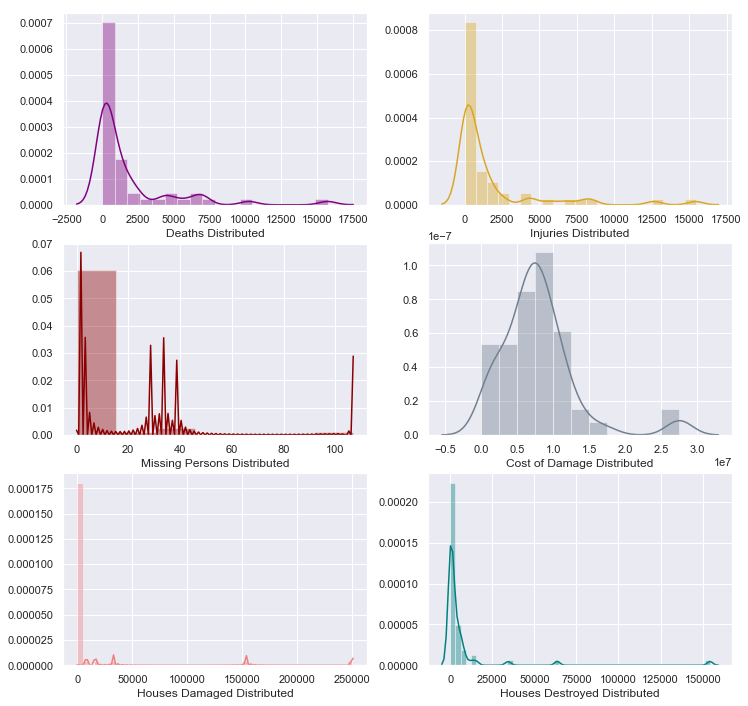

In [80]:
# Distribution plots for each feature.

sns.set(style='darkgrid')

f, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=False)
sns.distplot(a = magnitude_mean.Deaths, bins= None, hist=True, kde=True, color = 'purple',  axlabel='Deaths Distributed', ax=axes[0, 0]);
sns.distplot(a = magnitude_mean.Injuries, bins= None, hist=True, kde=True, color = 'goldenrod',  axlabel='Injuries Distributed', ax=axes[0, 1]);
sns.distplot(a = magnitude_mean.Missing, bins= None, hist=True, kde=True, color = 'darkred', axlabel='Missing Persons Distributed', ax=axes[1, 0]);
sns.distplot(a = magnitude_mean.Damage, bins= None, hist=True, kde=True, color = 'slategrey', axlabel='Cost of Damage Distributed', ax=axes[1, 1]);
sns.distplot(a = magnitude_mean['Houses Destroyed'], bins= None, hist=True, kde=True, color = 'teal', axlabel='Houses Destroyed Distributed', ax=axes[2, 1]);
sns.distplot(a = magnitude_mean['Houses Damaged'], bins= None, hist=True, kde=True, color = 'lightcoral', axlabel='Houses Damaged Distributed', ax=axes[2, 0]);

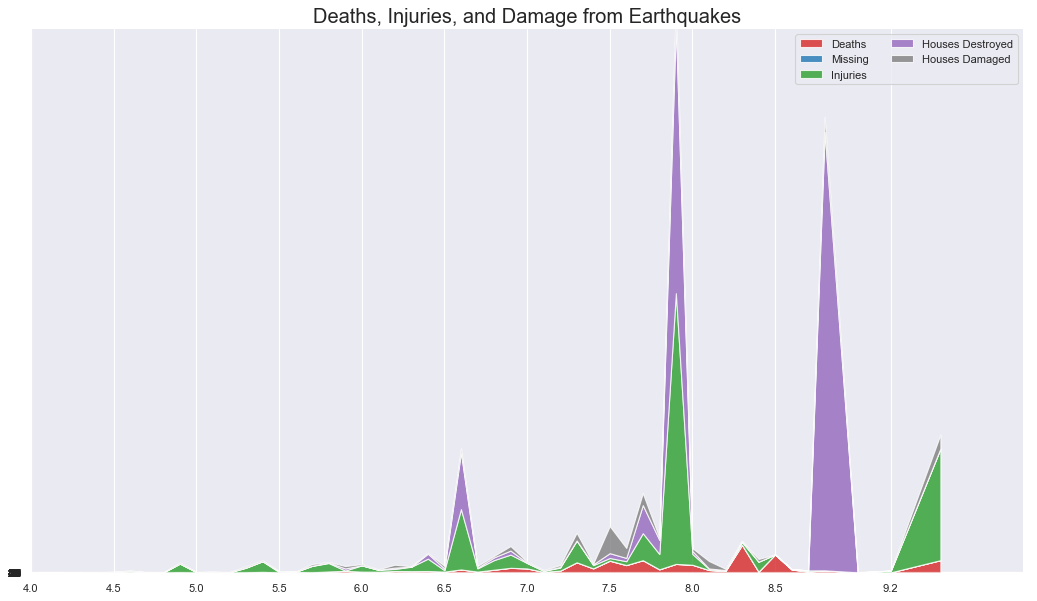

In [103]:
# Stacked Area Chart to show features based on Magnitude

# Decide Colors 
mycolors = ['tab:red', 'tab:blue', 'tab:green',  'tab:purple', 'tab:grey']      

# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)
labels = tsu_mean.index.drop(['Latitude', 'Longitude', 'Depth', 'Magnitude', 'Damage'])

# Prepare data
x  = magnitude_mean.index.values.tolist()
y0 = magnitude_mean['Deaths'].values.tolist()
y1 =magnitude_mean['Injuries'].values.tolist()
y2 =magnitude_mean['Missing'].values.tolist()
y4 = magnitude_mean['Houses Destroyed'].values.tolist()
y5 = magnitude_mean['Houses Damaged'].values.tolist()

y = np.vstack([y0, y2, y4, y5, y1])

# Plot for each column

ax = plt.gca()
ax.stackplot(x, y, labels=labels, colors=mycolors, alpha=0.8)

# Decorations
ax.set_title('Deaths, Injuries, and Damage from Earthquakes', fontsize=18)
ax.set(ylim=[0, 310000])
ax.set(xlim=[4, 10])
ax.legend(fontsize=10, ncol=2)
plt.xticks(x[::5], fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(0,50, 1), fontsize=10)
# plt.xlim(x[0], x[-1])

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.show()

In [126]:
# Plotly stacked area chart

import plotly.plotly as py
from plotly.graph_objs import *
py.sign_in('dlromanoff', '9sTMPd6l0kHW68sZ6Xx2')
trace1 = {
  "x": [4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 9.0, 9.2, 9.5], 
  "y": [0.0, 0.0, 0.0, 0.0, 10.6, 4.15384615, 18.3636364, 25.4, 10.0833333, 150.5, 23.1052632, 33.8947368, 11.4444444, 97.1666667, 338.55, 25.4827586, 252.933333, 93.173913, 550.642857, 906.625, 446.078431, 392.236842, 804.227273, 733.677419, 812.258065, 472.771429, 1712.35484, 473.756757, 1565.14286, 2643.58333, 2288.64286, 344.424242, 1021.55556, 5782.2973, 2319.16667, 6659.25424, 4199.74359, 6986.28947, 1748.40541, 4863.42857, 4380.78571, 1402.28571, 851.357143, 15746.8125, 435.4, 10250.0, 1706.0, 500.0, 1201.0, 50.0, 65.0, 7000.0], 
  "hoverinfo": "y+name", 
  "line": {"color": "rgb(99, 250, 99)"}, 
  "mode": "lines", 
  "name": "Deaths", 
  "type": "scatter", 
  "uid": "4b7a8908-8085-4f7d-84db-91246d8286dd", 
  "xsrc": "dlromanoff:130:86f0d0", 
  "ysrc": "dlromanoff:130:79c361"
}
trace2 = {
  "x": [4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 9.0, 9.2, 9.5], 
  "y": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 28.75, 0.0, 0.0, 0.0, 1.74193548, 0.0, 0.0, 0.0, 0.0, 1.75757576, 0.0, 0.0, 0.0, 106.93220339, 0.0, 1.36842105, 38.51351351, 0.0, 0.0, 0.0, 0.0, 3.1875, 33.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 
  "error_x": {
    "color": "rgb(239, 59, 212)", 
    "symmetric": False, 
    "thickness": 2, 
    "type": "percent", 
    "value": 10, 
    "valueminus": 10, 
    "visible": False, 
    "width": 4
  }, 
  "hoverinfo": "x+y+name", 
  "hoverlabel": {"namelength": 10}, 
  "hoveron": "points+fills", 
  "line": {"color": "rgb(239, 59, 212)"}, 
  "mode": "lines", 
  "name": "Missing", 
  "type": "scatter", 
  "uid": "436e6a54-13a8-40fb-9cbf-52464b534861", 
  "visible": True, 
  "xaxis": "x", 
  "xsrc": "dlromanoff:130:86f0d0", 
  "ysrc": "dlromanoff:130:2518d1"
}
trace3 = {
  "x": [4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 9.0, 9.2, 9.5], 
  "y": [0.0, 0.0, 0.0, 20.0, 113.8, 99.8461538, 254.181818, 15.0, 0.25, 0.0, 25.7894737, 112.0, 35.1111111, 127.111111, 26.55, 461.068966, 92.4666667, 78.6956522, 305.357143, 1173.95833, 26.1764706, 63.2368421, 741.818182, 14.516129, 2832.25806, 957.742857, 32329.129, 365.324324, 1538.45714, 2281.38889, 183.952381, 49.5454545, 365.444444, 26.1081081, 460.166667, 2743.71186, 1882.02564, 16023.0, 8080.40541, 153151.343, 1696.0, 207.428571, 186.0, 637.5625, 0.0, 0.0, 10.0, 0.0, 250002.0, 0.0, 0.0, 0.0], 
  "fillcolor": "rgba(0, 8, 244, 0.5)", 
  "hoverinfo": "y+name", 
  "line": {"color": "rgb(0, 16, 249)"}, 
  "mode": "lines", 
  "name": "Houses Damaged", 
  "type": "scatter", 
  "uid": "509dbead-ac1c-4f87-b987-c78fa8bdbb87", 
  "xsrc": "dlromanoff:130:86f0d0", 
  "ysrc": "dlromanoff:130:76dab7"
}
trace4 = {
  "x": [4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 9.0, 9.2, 9.5], 
  "y": [0.0, 0.0, 0.0, 11.8, 14.2, 100.384615, 220.272727, 27.6, 21.75, 653.5, 38.6315789, 187.157895, 81.4444444, 685.222222, 491.2, 96.6896552, 64.2666667, 951.478261, 342.357143, 1376.875, 683.901961, 292.131579, 1636.34091, 241.548387, 459.419355, 1470.17143, 2310.32258, 999.621622, 821.342857, 2581.5, 580.0, 409.545455, 1027.03704, 4395.97297, 422.611111, 15433.4407, 5667.82051, 6810.44737, 1258.83784, 12645.9429, 1601.64286, 4266.5, 712.0, 152.875, 1542.6, 0.0, 0.0, 0.0, 8500.0, 0.0, 0.0, 8000.0], 
  "fillcolor": "rgba(255, 0, 8, 0.5)", 
  "hoverinfo": "y+name", 
  "line": {"color": "rgb(249, 0, 24)"}, 
  "mode": "lines", 
  "name": "Injuries", 
  "type": "scatter", 
  "uid": "887665cc-d21f-4df4-a96d-a22c6ba9fdbb", 
  "xsrc": "dlromanoff:130:86f0d0", 
  "ysrc": "dlromanoff:130:2f362c"
}
trace5 = {
  "x": [4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 9.0, 9.2, 9.5], 
  "y": [0.0, 0.0, 0.0, 0.0, 10.0, 204.923077, 644.545455, 100.0, 0.0, 4895.9, 144.263158, 176.789474, 64.9444444, 2590.05556, 6058.55, 199.344828, 80.0, 3654.95652, 4824.67857, 187.291667, 3596.70588, 1093.31579, 1177.25, 2547.6129, 7046.03226, 821.2, 34421.0645, 1845.91892, 5482.62857, 7547.27778, 3078.7381, 589.121212, 1752.55556, 12436.7297, 1846.05556, 1487.35593, 2203.64103, 15402.2368, 8725.05405, 154415.771, 6160.28571, 651.214286, 342.071429, 1462.8125, 5679.8, 0.0, 200.0, 666.666667, 0.0, 0.0, 1000.0, 63622.0], 
  "hoverinfo": "y+name", 
  "line": {"color": "rgb(249, 245, 7)"}, 
  "mode": "lines", 
  "name": "Houses Destroyed", 
  "type": "scatter", 
  "uid": "0812970a-7a09-425d-b280-49afecd1b5c5", 
  "xsrc": "dlromanoff:130:86f0d0", 
  "ysrc": "dlromanoff:130:a2eddf"
}
data = Data([trace1, trace2, trace3, trace4, trace5])
layout = {
  "autosize": True, 
  "dragmode": "zoom", 
  "hovermode": "x", 
  "plot_bgcolor": "rgb(20, 19, 19)", 
  "title": {"text": "Damage Based on Magnitutde"}, 
  "xaxis": {
    "autorange": True, 
    "range": [4, 9.5], 
    "title": {"text": "Magnitude"}, 
    "type": "linear"
  }, 
  "yaxis": {
    "autorange": True, 
    "range": [0, 342185.7741789473], 
    "title": {"text": "Mean Value of each Feature"}, 
    "type": "linear"
  }
}
fig = Figure(data=data, layout=layout)
plot_url = py.plot(fig)

In [1]:
# Attempting a violin chart with additional information about each of the 5 traces. Kept getting an error.

# import plotly.plotly as py
# from plotly.graph_objs import *
# py.sign_in('dlromanoff', '9sTMPd6l0kHW68sZ6Xx2')
# trace1 = {
#   "x": [4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
#        5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
#        6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
#        7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 9. , 9.2, 9.5], 
#   "y": [-2.5620495082844172, -2.5190692684981966, -2.4760890287119763, -2.4331087889257557, -2.3901285491395354, -2.3471483093533148, -2.304168069567094, -2.261187829780874, -2.218207589994653, -2.1752273502084325, -2.1322471104222123, -2.0892668706359916, -2.046286630849771, -2.0033063910635507, -1.96032615127733, -1.9173459114911096, -1.874365671704889, -1.8313854319186686, -1.7884051921324482, -1.7454249523462275, -1.702444712560007, -1.6594644727737866, -1.616484232987566, -1.5735039932013455, -1.530523753415125, -1.4875435136289046, -1.4445632738426841, -1.4015830340564635, -1.358602794270243, -1.3156225544840225, -1.2726423146978019, -1.2296620749115814, -1.186681835125361, -1.1437015953391405, -1.10072135555292, -1.0577411157666994, -1.014760875980479, -0.9717806361942585, -0.9288003964080378, -0.8858201566218173, -0.8428399168355969, -0.7998596770493764, -0.756879437263156, -0.7138991974769353, -0.6709189576907149, -0.6279387179044944, -0.5849584781182737, -0.5419782383320535, -0.4989979985458328, -0.45601775875961215, -0.4130375189733919, -0.37005727918717124, -0.327077039400951, -0.28409679961473033, -0.24111655982850966, -0.19813632004228943, -0.15515608025606875, -0.11217584046984808, -0.06919560068362784, -0.02621536089740717, 0.016764878888813506, 0.05974511867503374, 0.10272535846125441, 0.14570559824747464, 0.18868583803369532, 0.231666077819916, 0.2746463176061362, 0.3176265573923569, 0.36060679717857713, 0.4035870369647978, 0.4465672767510185, 0.4895475165372387, 0.5325277563234594, 0.5755079961096801, 0.6184882358959003, 0.661468475682121, 0.7044487154683416, 0.7474289552545619, 0.7904091950407826, 0.8333894348270028, 0.8763696746132235, 0.9193499143994441, 0.9623301541856644, 1.005310393971885, 1.0482906337581053, 1.091270873544326, 1.1342511133305466, 1.1772313531167669, 1.2202115929029875, 1.2631918326892082, 1.3061720724754284, 1.3491523122616491, 1.3921325520478698, 1.43511279183409, 1.4780930316203102, 1.5210732714065314, 1.5640535111927516, 1.6070337509789718, 1.650013990765193, 1.6929942305514136], 
#   "fill": "tonextx", 
#   "fillcolor": "#604d9e", 
#   "hoverinfo": "text", 
#   "line": {
#     "color": "rgb(50,50,50)", 
#     "shape": "spline", 
#     "width": 0.5
#   }, 
#   "mode": "lines", 
#   "name": "", 
#   "opacity": 0.5, 
#   "text": ["(pdf(y), y)=(-0.07, -2.56)", "(pdf(y), y)=(-0.08, -2.52)", "(pdf(y), y)=(-0.08, -2.48)", "(pdf(y), y)=(-0.09, -2.43)", "(pdf(y), y)=(-0.10, -2.39)", "(pdf(y), y)=(-0.10, -2.35)", "(pdf(y), y)=(-0.11, -2.30)", "(pdf(y), y)=(-0.12, -2.26)", "(pdf(y), y)=(-0.13, -2.22)", "(pdf(y), y)=(-0.14, -2.18)", "(pdf(y), y)=(-0.14, -2.13)", "(pdf(y), y)=(-0.15, -2.09)", "(pdf(y), y)=(-0.16, -2.05)", "(pdf(y), y)=(-0.17, -2.00)", "(pdf(y), y)=(-0.18, -1.96)", "(pdf(y), y)=(-0.19, -1.92)", "(pdf(y), y)=(-0.19, -1.87)", "(pdf(y), y)=(-0.20, -1.83)", "(pdf(y), y)=(-0.21, -1.79)", "(pdf(y), y)=(-0.22, -1.75)", "(pdf(y), y)=(-0.23, -1.70)", "(pdf(y), y)=(-0.24, -1.66)", "(pdf(y), y)=(-0.24, -1.62)", "(pdf(y), y)=(-0.25, -1.57)", "(pdf(y), y)=(-0.26, -1.53)", "(pdf(y), y)=(-0.27, -1.49)", "(pdf(y), y)=(-0.27, -1.44)", "(pdf(y), y)=(-0.28, -1.40)", "(pdf(y), y)=(-0.29, -1.36)", "(pdf(y), y)=(-0.29, -1.32)", "(pdf(y), y)=(-0.30, -1.27)", "(pdf(y), y)=(-0.30, -1.23)", "(pdf(y), y)=(-0.30, -1.19)", "(pdf(y), y)=(-0.30, -1.14)", "(pdf(y), y)=(-0.31, -1.10)", "(pdf(y), y)=(-0.31, -1.06)", "(pdf(y), y)=(-0.31, -1.01)", "(pdf(y), y)=(-0.31, -0.97)", "(pdf(y), y)=(-0.31, -0.93)", "(pdf(y), y)=(-0.31, -0.89)", "(pdf(y), y)=(-0.30, -0.84)", "(pdf(y), y)=(-0.30, -0.80)", "(pdf(y), y)=(-0.30, -0.76)", "(pdf(y), y)=(-0.30, -0.71)", "(pdf(y), y)=(-0.30, -0.67)", "(pdf(y), y)=(-0.29, -0.63)", "(pdf(y), y)=(-0.29, -0.58)", "(pdf(y), y)=(-0.29, -0.54)", "(pdf(y), y)=(-0.29, -0.50)", "(pdf(y), y)=(-0.28, -0.46)", "(pdf(y), y)=(-0.28, -0.41)", "(pdf(y), y)=(-0.28, -0.37)", "(pdf(y), y)=(-0.28, -0.33)", "(pdf(y), y)=(-0.28, -0.28)", "(pdf(y), y)=(-0.28, -0.24)", "(pdf(y), y)=(-0.28, -0.20)", "(pdf(y), y)=(-0.28, -0.16)", "(pdf(y), y)=(-0.28, -0.11)", "(pdf(y), y)=(-0.28, -0.07)", "(pdf(y), y)=(-0.28, -0.03)", "(pdf(y), y)=(-0.28, 0.02)", "(pdf(y), y)=(-0.27, 0.06)", "(pdf(y), y)=(-0.27, 0.10)", "(pdf(y), y)=(-0.27, 0.15)", "(pdf(y), y)=(-0.27, 0.19)", "(pdf(y), y)=(-0.27, 0.23)", "(pdf(y), y)=(-0.26, 0.27)", "(pdf(y), y)=(-0.26, 0.32)", "(pdf(y), y)=(-0.26, 0.36)", "(pdf(y), y)=(-0.25, 0.40)", "(pdf(y), y)=(-0.25, 0.45)", "(pdf(y), y)=(-0.24, 0.49)", "(pdf(y), y)=(-0.24, 0.53)", "(pdf(y), y)=(-0.23, 0.58)", "(pdf(y), y)=(-0.22, 0.62)", "(pdf(y), y)=(-0.22, 0.66)", "(pdf(y), y)=(-0.21, 0.70)", "(pdf(y), y)=(-0.21, 0.75)", "(pdf(y), y)=(-0.20, 0.79)", "(pdf(y), y)=(-0.20, 0.83)", "(pdf(y), y)=(-0.19, 0.88)", "(pdf(y), y)=(-0.19, 0.92)", "(pdf(y), y)=(-0.18, 0.96)", "(pdf(y), y)=(-0.17, 1.01)", "(pdf(y), y)=(-0.17, 1.05)", "(pdf(y), y)=(-0.16, 1.09)", "(pdf(y), y)=(-0.16, 1.13)", "(pdf(y), y)=(-0.15, 1.18)", "(pdf(y), y)=(-0.15, 1.22)", "(pdf(y), y)=(-0.14, 1.26)", "(pdf(y), y)=(-0.14, 1.31)", "(pdf(y), y)=(-0.13, 1.35)", "(pdf(y), y)=(-0.13, 1.39)", "(pdf(y), y)=(-0.12, 1.44)", "(pdf(y), y)=(-0.12, 1.48)", "(pdf(y), y)=(-0.11, 1.52)", "(pdf(y), y)=(-0.10, 1.56)", "(pdf(y), y)=(-0.10, 1.61)", "(pdf(y), y)=(-0.09, 1.65)", "(pdf(y), y)=(-0.09, 1.69)"], 
#   "type": "scatter", 
#   "xaxis": "x1", 
#   "yaxis": "y1"
# }
# trace2 = {
#   "x": [4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
#        5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
#        6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
#        7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 9. , 9.2, 9.5],
#   "y": [-2.5620495082844172, -2.5190692684981966, -2.4760890287119763, -2.4331087889257557, -2.3901285491395354, -2.3471483093533148, -2.304168069567094, -2.261187829780874, -2.218207589994653, -2.1752273502084325, -2.1322471104222123, -2.0892668706359916, -2.046286630849771, -2.0033063910635507, -1.96032615127733, -1.9173459114911096, -1.874365671704889, -1.8313854319186686, -1.7884051921324482, -1.7454249523462275, -1.702444712560007, -1.6594644727737866, -1.616484232987566, -1.5735039932013455, -1.530523753415125, -1.4875435136289046, -1.4445632738426841, -1.4015830340564635, -1.358602794270243, -1.3156225544840225, -1.2726423146978019, -1.2296620749115814, -1.186681835125361, -1.1437015953391405, -1.10072135555292, -1.0577411157666994, -1.014760875980479, -0.9717806361942585, -0.9288003964080378, -0.8858201566218173, -0.8428399168355969, -0.7998596770493764, -0.756879437263156, -0.7138991974769353, -0.6709189576907149, -0.6279387179044944, -0.5849584781182737, -0.5419782383320535, -0.4989979985458328, -0.45601775875961215, -0.4130375189733919, -0.37005727918717124, -0.327077039400951, -0.28409679961473033, -0.24111655982850966, -0.19813632004228943, -0.15515608025606875, -0.11217584046984808, -0.06919560068362784, -0.02621536089740717, 0.016764878888813506, 0.05974511867503374, 0.10272535846125441, 0.14570559824747464, 0.18868583803369532, 0.231666077819916, 0.2746463176061362, 0.3176265573923569, 0.36060679717857713, 0.4035870369647978, 0.4465672767510185, 0.4895475165372387, 0.5325277563234594, 0.5755079961096801, 0.6184882358959003, 0.661468475682121, 0.7044487154683416, 0.7474289552545619, 0.7904091950407826, 0.8333894348270028, 0.8763696746132235, 0.9193499143994441, 0.9623301541856644, 1.005310393971885, 1.0482906337581053, 1.091270873544326, 1.1342511133305466, 1.1772313531167669, 1.2202115929029875, 1.2631918326892082, 1.3061720724754284, 1.3491523122616491, 1.3921325520478698, 1.43511279183409, 1.4780930316203102, 1.5210732714065314, 1.5640535111927516, 1.6070337509789718, 1.650013990765193, 1.6929942305514136], 
#   "fill": "tonextx", 
#   "fillcolor": "#604d9e", 
#   "hoverinfo": "text", 
#   "line": {
#     "color": "rgb(50,50,50)", 
#     "shape": "spline", 
#     "width": 0.5
#   }, 
#   "mode": "lines", 
#   "name": "", 
#   "opacity": 0.5, 
#   "text": ["(pdf(y), y)=(0.07, -2.56)", "(pdf(y), y)=(0.08, -2.52)", "(pdf(y), y)=(0.08, -2.48)", "(pdf(y), y)=(0.09, -2.43)", "(pdf(y), y)=(0.10, -2.39)", "(pdf(y), y)=(0.10, -2.35)", "(pdf(y), y)=(0.11, -2.30)", "(pdf(y), y)=(0.12, -2.26)", "(pdf(y), y)=(0.13, -2.22)", "(pdf(y), y)=(0.14, -2.18)", "(pdf(y), y)=(0.14, -2.13)", "(pdf(y), y)=(0.15, -2.09)", "(pdf(y), y)=(0.16, -2.05)", "(pdf(y), y)=(0.17, -2.00)", "(pdf(y), y)=(0.18, -1.96)", "(pdf(y), y)=(0.19, -1.92)", "(pdf(y), y)=(0.19, -1.87)", "(pdf(y), y)=(0.20, -1.83)", "(pdf(y), y)=(0.21, -1.79)", "(pdf(y), y)=(0.22, -1.75)", "(pdf(y), y)=(0.23, -1.70)", "(pdf(y), y)=(0.24, -1.66)", "(pdf(y), y)=(0.24, -1.62)", "(pdf(y), y)=(0.25, -1.57)", "(pdf(y), y)=(0.26, -1.53)", "(pdf(y), y)=(0.27, -1.49)", "(pdf(y), y)=(0.27, -1.44)", "(pdf(y), y)=(0.28, -1.40)", "(pdf(y), y)=(0.29, -1.36)", "(pdf(y), y)=(0.29, -1.32)", "(pdf(y), y)=(0.30, -1.27)", "(pdf(y), y)=(0.30, -1.23)", "(pdf(y), y)=(0.30, -1.19)", "(pdf(y), y)=(0.30, -1.14)", "(pdf(y), y)=(0.31, -1.10)", "(pdf(y), y)=(0.31, -1.06)", "(pdf(y), y)=(0.31, -1.01)", "(pdf(y), y)=(0.31, -0.97)", "(pdf(y), y)=(0.31, -0.93)", "(pdf(y), y)=(0.31, -0.89)", "(pdf(y), y)=(0.30, -0.84)", "(pdf(y), y)=(0.30, -0.80)", "(pdf(y), y)=(0.30, -0.76)", "(pdf(y), y)=(0.30, -0.71)", "(pdf(y), y)=(0.30, -0.67)", "(pdf(y), y)=(0.29, -0.63)", "(pdf(y), y)=(0.29, -0.58)", "(pdf(y), y)=(0.29, -0.54)", "(pdf(y), y)=(0.29, -0.50)", "(pdf(y), y)=(0.28, -0.46)", "(pdf(y), y)=(0.28, -0.41)", "(pdf(y), y)=(0.28, -0.37)", "(pdf(y), y)=(0.28, -0.33)", "(pdf(y), y)=(0.28, -0.28)", "(pdf(y), y)=(0.28, -0.24)", "(pdf(y), y)=(0.28, -0.20)", "(pdf(y), y)=(0.28, -0.16)", "(pdf(y), y)=(0.28, -0.11)", "(pdf(y), y)=(0.28, -0.07)", "(pdf(y), y)=(0.28, -0.03)", "(pdf(y), y)=(0.28, 0.02)", "(pdf(y), y)=(0.27, 0.06)", "(pdf(y), y)=(0.27, 0.10)", "(pdf(y), y)=(0.27, 0.15)", "(pdf(y), y)=(0.27, 0.19)", "(pdf(y), y)=(0.27, 0.23)", "(pdf(y), y)=(0.26, 0.27)", "(pdf(y), y)=(0.26, 0.32)", "(pdf(y), y)=(0.26, 0.36)", "(pdf(y), y)=(0.25, 0.40)", "(pdf(y), y)=(0.25, 0.45)", "(pdf(y), y)=(0.24, 0.49)", "(pdf(y), y)=(0.24, 0.53)", "(pdf(y), y)=(0.23, 0.58)", "(pdf(y), y)=(0.22, 0.62)", "(pdf(y), y)=(0.22, 0.66)", "(pdf(y), y)=(0.21, 0.70)", "(pdf(y), y)=(0.21, 0.75)", "(pdf(y), y)=(0.20, 0.79)", "(pdf(y), y)=(0.20, 0.83)", "(pdf(y), y)=(0.19, 0.88)", "(pdf(y), y)=(0.19, 0.92)", "(pdf(y), y)=(0.18, 0.96)", "(pdf(y), y)=(0.17, 1.01)", "(pdf(y), y)=(0.17, 1.05)", "(pdf(y), y)=(0.16, 1.09)", "(pdf(y), y)=(0.16, 1.13)", "(pdf(y), y)=(0.15, 1.18)", "(pdf(y), y)=(0.15, 1.22)", "(pdf(y), y)=(0.14, 1.26)", "(pdf(y), y)=(0.14, 1.31)", "(pdf(y), y)=(0.13, 1.35)", "(pdf(y), y)=(0.13, 1.39)", "(pdf(y), y)=(0.12, 1.44)", "(pdf(y), y)=(0.12, 1.48)", "(pdf(y), y)=(0.11, 1.52)", "(pdf(y), y)=(0.10, 1.56)", "(pdf(y), y)=(0.10, 1.61)", "(pdf(y), y)=(0.09, 1.65)", "(pdf(y), y)=(0.09, 1.69)"], 
#   "type": "scatter", 
#   "xaxis": "x1", 
#   "yaxis": "y1"
# }
# trace3 = {
#   "x": [0, 0], 
#   "y": [-2.5620495082844172, 1.6929942305514136], 
#   "line": {
#     "color": "rgb(0,0,0)", 
#     "width": 1.5
#   }, 
#   "mode": "lines", 
#   "name": "", 
#   "type": "scatter", 
#   "xaxis": "x1", 
#   "yaxis": "y1"
# }
# trace4 = {
#   "x": [0, 0], 
#   "y": [-1.3201540891955128, 0.3228719990055618], 
#   "hoverinfo": "text", 
#   "line": {
#     "color": "rgb(0,0,0)", 
#     "width": 4
#   }, 
#   "mode": "lines", 
#   "name": "Trace 3, y", 
#   "text": ["lower-quartile: -1.32", "upper-quartile: 0.32"], 
#   "type": "scatter", 
#   "xaxis": "x1", 
#   "yaxis": "y1"
# }
# trace5 = {
#   "x": [0], 
#   "y": [-0.5813298729588559], 
#   "hoverinfo": "text", 
#   "marker": {
#     "color": "rgb(255,255,255)", 
#     "symbol": "square"
#   }, 
#   "mode": "markers", 
#   "name": "Trace 4, y", 
#   "text": ["median: -0.58"], 
#   "type": "scatter", 
#   "xaxis": "x1", 
#   "yaxis": "y1"
# }
# trace6 = {
#   "x": [4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
#        5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
#        6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
#        7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 9. , 9.2, 9.5],
#   "y": [-1.1125253382597255, -1.6253566775275783, -2.201448792596418, -2.057757063792616, -0.7256978116584787, 0.9585224868637818, 1.6929942305514136, -0.9694544176708614, 0.8603300608050809, -0.8445899937156746, -1.3201540891955128, -1.964601690251192, -0.39869093020072477, -0.05613220723738427, 0.057748197128166395, -1.3148668316719225, -0.7252607017755264, 0.21758203844240612, -1.4129168686082765, -0.8099312609321186, -0.4373990441421853, -0.05258185288925626, 0.22144711155808514, 0.7711426851013731, -1.8578089462667493, -1.4480126011669594, 1.6207128011098948, -0.970041832133456, -1.2023269461374666, -0.7587134769865617, -2.038686347866267, -1.6161642581377291, -0.06625041309353882, 1.3211959499278538, 0.7590312080155955, -0.3231594584236024, -0.9137250777402666, 1.023304625619317, 0.38923664200754066, -1.438043604600783, 0.3549282224308525, -1.3322460038944708, 1.5088643148117784, 0.26751117515488443, 0.19287411658221745, 1.1128432725608386, -0.9335603103279382, -1.051280923715165, 0.13054352945183964, -2.5620495082844172, -0.019392996326458183, 0.3228719990055618], 
#   "hoverinfo": "y", 
#   "marker": {
#     "color": "#604d9e", 
#     "symbol": "line-ew-open"
#   }, 
#   "mode": "markers", 
#   "name": "", 
#   "showlegend": False, 
#   "type": "scatter", 
#   "xaxis": "x1", 
#   "yaxis": "y1"
# }
# trace7 = {
#   "x": [-0.01591238817892658, -0.016974330317069512, -0.018133806427715223, -0.01942249370312594, -0.020875501003019426, -0.022530311257615714, -0.024425553916010964, -0.02659967167833786, -0.029089549861435315, -0.03192917444066055, -0.03514837656565662, -0.03877170843303767, -0.042817479732849544, -0.04729696779849882, -0.05221380050514806, -0.057563501039245346, -0.06333317945177909, -0.06950135806720475, -0.07603792594301143, -0.08290423017161876, -0.09005332645735671, -0.09743042502164413, -0.10497357721859357, -0.11261465030628347, -0.12028063043803161, -0.12789527615679522, -0.13538111703622266, -0.1426617567305224, -0.14966440011410714, -0.1563224850105985, -0.16257826534204883, -0.16838516934695827, -0.17370974798286756, -0.17853303750048347, -0.1828511873583865, -0.18667524898309362, -0.19003007918559683, -0.19295237940500695, -0.1954879622184397, -0.1976884030226243, -0.19960729090794088, -0.20129633283301973, -0.20280158507136758, -0.20416008326415364, -0.20539711714563688, -0.2065243501247766, -0.20753892134588453, -0.20842359406280386, -0.2091479355590378, -0.20967043718182263, -0.20994141477927983, -0.20990647548830355, -0.2095103005826407, -0.20870047839168976, -0.2074311266779721, -0.20566606897085526, -0.20338137116973481, -0.20056709890063795, -0.1972282174373092, -0.19338461897895262, -0.18907032145852792, -0.18433193433310005, -0.17922652661697552, -0.17381905877756426, -0.1681795524931772, -0.16238017148946296, -0.15649237463932378, -0.1505842818760824, -0.14471836720072356, -0.13894956405491243, -0.13332383907015544, -0.12787726255326337, -0.12263557918272584, -0.11761426075995154, -0.11281900446495358, -0.10824662460108295, -0.1038862729191137, -0.09972091207887791, -0.09572895870617551, -0.0918860072112491, -0.08816654366797262, -0.08454556131071236, -0.08099999617400841, -0.07750991334349062, -0.07405939098247341, -0.07063706994766455, -0.06723636003960694, -0.06385531791890561, -0.06049623436565526, -0.05716498776785226, -0.053870234663073696, -0.050622515509774, -0.04743335401257948, -0.044314421441801935, -0.041276824415825274, -0.03833055715317956, -0.03548413929236664, -0.0327444402506597, -0.03011667288499336, -0.027604524718476024], 
#   "y": [-4.052897461029216, -3.9709640546251004, -3.889030648220984, -3.8070972418168676, -3.7251638354127516, -3.6432304290086357, -3.5612970226045193, -3.479363616200403, -3.397430209796287, -3.315496803392171, -3.2335633969880546, -3.1516299905839382, -3.0696965841798223, -2.9877631777757063, -2.90582977137159, -2.8238963649674735, -2.7419629585633576, -2.6600295521592416, -2.5780961457551252, -2.496162739351009, -2.414229332946893, -2.332295926542777, -2.2503625201386606, -2.168429113734544, -2.086495707330428, -2.0045623009263123, -1.9226288945221959, -1.8406954881180795, -1.7587620817139635, -1.6768286753098476, -1.5948952689057312, -1.5129618625016148, -1.4310284560974988, -1.349095049693383, -1.2671616432892665, -1.18522823688515, -1.1032948304810342, -1.0213614240769182, -0.9394280176728018, -0.8574946112686854, -0.7755612048645695, -0.6936277984604535, -0.6116943920563371, -0.5297609856522207, -0.4478275792481048, -0.36589417284398884, -0.28396076643987245, -0.20202736003575605, -0.1200939536316401, -0.038160547227524155, 0.043772859176591794, 0.12570626558070863, 0.20763967198482458, 0.28957307838894053, 0.37150648479305737, 0.4534398911971733, 0.5353732976012893, 0.6173067040054052, 0.6992401104095212, 0.781173516813638, 0.863106923217754, 0.9450403296218699, 1.0269737360259867, 1.1089071424301027, 1.1908405488342186, 1.2727739552383346, 1.3547073616424505, 1.4366407680465674, 1.5185741744506833, 1.6005075808547993, 1.682440987258916, 1.764374393663032, 1.846307800067148, 1.928241206471264, 2.01017461287538, 2.0921080192794967, 2.1740414256836127, 2.2559748320877286, 2.3379082384918455, 2.4198416448959614, 2.5017750513000774, 2.5837084577041933, 2.6656418641083093, 2.747575270512426, 2.829508676916542, 2.911442083320658, 2.993375489724775, 3.075308896128891, 3.1572423025330068, 3.2391757089371227, 3.3211091153412386, 3.4030425217453555, 3.4849759281494714, 3.5669093345535874, 3.6488427409577042, 3.73077614736182, 3.812709553765936, 3.894642960170052, 3.976576366574168, 4.058509772978286], 
#   "fill": "tonextx", 
#   "fillcolor": "#6c4774", 
#   "hoverinfo": "text", 
#   "line": {
#     "color": "rgb(50,50,50)", 
#     "shape": "spline", 
#     "width": 0.5
#   }, 
#   "mode": "lines", 
#   "name": "", 
#   "opacity": 0.5, 
#   "text": ["(pdf(y), y)=(-0.02, -4.05)", "(pdf(y), y)=(-0.02, -3.97)", "(pdf(y), y)=(-0.02, -3.89)", "(pdf(y), y)=(-0.02, -3.81)", "(pdf(y), y)=(-0.02, -3.73)", "(pdf(y), y)=(-0.02, -3.64)", "(pdf(y), y)=(-0.02, -3.56)", "(pdf(y), y)=(-0.03, -3.48)", "(pdf(y), y)=(-0.03, -3.40)", "(pdf(y), y)=(-0.03, -3.32)", "(pdf(y), y)=(-0.04, -3.23)", "(pdf(y), y)=(-0.04, -3.15)", "(pdf(y), y)=(-0.04, -3.07)", "(pdf(y), y)=(-0.05, -2.99)", "(pdf(y), y)=(-0.05, -2.91)", "(pdf(y), y)=(-0.06, -2.82)", "(pdf(y), y)=(-0.06, -2.74)", "(pdf(y), y)=(-0.07, -2.66)", "(pdf(y), y)=(-0.08, -2.58)", "(pdf(y), y)=(-0.08, -2.50)", "(pdf(y), y)=(-0.09, -2.41)", "(pdf(y), y)=(-0.10, -2.33)", "(pdf(y), y)=(-0.10, -2.25)", "(pdf(y), y)=(-0.11, -2.17)", "(pdf(y), y)=(-0.12, -2.09)", "(pdf(y), y)=(-0.13, -2.00)", "(pdf(y), y)=(-0.14, -1.92)", "(pdf(y), y)=(-0.14, -1.84)", "(pdf(y), y)=(-0.15, -1.76)", "(pdf(y), y)=(-0.16, -1.68)", "(pdf(y), y)=(-0.16, -1.59)", "(pdf(y), y)=(-0.17, -1.51)", "(pdf(y), y)=(-0.17, -1.43)", "(pdf(y), y)=(-0.18, -1.35)", "(pdf(y), y)=(-0.18, -1.27)", "(pdf(y), y)=(-0.19, -1.19)", "(pdf(y), y)=(-0.19, -1.10)", "(pdf(y), y)=(-0.19, -1.02)", "(pdf(y), y)=(-0.20, -0.94)", "(pdf(y), y)=(-0.20, -0.86)", "(pdf(y), y)=(-0.20, -0.78)", "(pdf(y), y)=(-0.20, -0.69)", "(pdf(y), y)=(-0.20, -0.61)", "(pdf(y), y)=(-0.20, -0.53)", "(pdf(y), y)=(-0.21, -0.45)", "(pdf(y), y)=(-0.21, -0.37)", "(pdf(y), y)=(-0.21, -0.28)", "(pdf(y), y)=(-0.21, -0.20)", "(pdf(y), y)=(-0.21, -0.12)", "(pdf(y), y)=(-0.21, -0.04)", "(pdf(y), y)=(-0.21, 0.04)", "(pdf(y), y)=(-0.21, 0.13)", "(pdf(y), y)=(-0.21, 0.21)", "(pdf(y), y)=(-0.21, 0.29)", "(pdf(y), y)=(-0.21, 0.37)", "(pdf(y), y)=(-0.21, 0.45)", "(pdf(y), y)=(-0.20, 0.54)", "(pdf(y), y)=(-0.20, 0.62)", "(pdf(y), y)=(-0.20, 0.70)", "(pdf(y), y)=(-0.19, 0.78)", "(pdf(y), y)=(-0.19, 0.86)", "(pdf(y), y)=(-0.18, 0.95)", "(pdf(y), y)=(-0.18, 1.03)", "(pdf(y), y)=(-0.17, 1.11)", "(pdf(y), y)=(-0.17, 1.19)", "(pdf(y), y)=(-0.16, 1.27)", "(pdf(y), y)=(-0.16, 1.35)", "(pdf(y), y)=(-0.15, 1.44)", "(pdf(y), y)=(-0.14, 1.52)", "(pdf(y), y)=(-0.14, 1.60)", "(pdf(y), y)=(-0.13, 1.68)", "(pdf(y), y)=(-0.13, 1.76)", "(pdf(y), y)=(-0.12, 1.85)", "(pdf(y), y)=(-0.12, 1.93)", "(pdf(y), y)=(-0.11, 2.01)", "(pdf(y), y)=(-0.11, 2.09)", "(pdf(y), y)=(-0.10, 2.17)", "(pdf(y), y)=(-0.10, 2.26)", "(pdf(y), y)=(-0.10, 2.34)", "(pdf(y), y)=(-0.09, 2.42)", "(pdf(y), y)=(-0.09, 2.50)", "(pdf(y), y)=(-0.08, 2.58)", "(pdf(y), y)=(-0.08, 2.67)", "(pdf(y), y)=(-0.08, 2.75)", "(pdf(y), y)=(-0.07, 2.83)", "(pdf(y), y)=(-0.07, 2.91)", "(pdf(y), y)=(-0.07, 2.99)", "(pdf(y), y)=(-0.06, 3.08)", "(pdf(y), y)=(-0.06, 3.16)", "(pdf(y), y)=(-0.06, 3.24)", "(pdf(y), y)=(-0.05, 3.32)", "(pdf(y), y)=(-0.05, 3.40)", "(pdf(y), y)=(-0.05, 3.48)", "(pdf(y), y)=(-0.04, 3.57)", "(pdf(y), y)=(-0.04, 3.65)", "(pdf(y), y)=(-0.04, 3.73)", "(pdf(y), y)=(-0.04, 3.81)", "(pdf(y), y)=(-0.03, 3.89)", "(pdf(y), y)=(-0.03, 3.98)", "(pdf(y), y)=(-0.03, 4.06)"], 
#   "type": "scatter", 
#   "xaxis": "x2", 
#   "yaxis": "y1"
# }
# trace8 = {
#   "x": [4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
#        5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
#        6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
#        7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 9. , 9.2, 9.5], 
#   "y": [-4.052897461029216, -3.9709640546251004, -3.889030648220984, -3.8070972418168676, -3.7251638354127516, -3.6432304290086357, -3.5612970226045193, -3.479363616200403, -3.397430209796287, -3.315496803392171, -3.2335633969880546, -3.1516299905839382, -3.0696965841798223, -2.9877631777757063, -2.90582977137159, -2.8238963649674735, -2.7419629585633576, -2.6600295521592416, -2.5780961457551252, -2.496162739351009, -2.414229332946893, -2.332295926542777, -2.2503625201386606, -2.168429113734544, -2.086495707330428, -2.0045623009263123, -1.9226288945221959, -1.8406954881180795, -1.7587620817139635, -1.6768286753098476, -1.5948952689057312, -1.5129618625016148, -1.4310284560974988, -1.349095049693383, -1.2671616432892665, -1.18522823688515, -1.1032948304810342, -1.0213614240769182, -0.9394280176728018, -0.8574946112686854, -0.7755612048645695, -0.6936277984604535, -0.6116943920563371, -0.5297609856522207, -0.4478275792481048, -0.36589417284398884, -0.28396076643987245, -0.20202736003575605, -0.1200939536316401, -0.038160547227524155, 0.043772859176591794, 0.12570626558070863, 0.20763967198482458, 0.28957307838894053, 0.37150648479305737, 0.4534398911971733, 0.5353732976012893, 0.6173067040054052, 0.6992401104095212, 0.781173516813638, 0.863106923217754, 0.9450403296218699, 1.0269737360259867, 1.1089071424301027, 1.1908405488342186, 1.2727739552383346, 1.3547073616424505, 1.4366407680465674, 1.5185741744506833, 1.6005075808547993, 1.682440987258916, 1.764374393663032, 1.846307800067148, 1.928241206471264, 2.01017461287538, 2.0921080192794967, 2.1740414256836127, 2.2559748320877286, 2.3379082384918455, 2.4198416448959614, 2.5017750513000774, 2.5837084577041933, 2.6656418641083093, 2.747575270512426, 2.829508676916542, 2.911442083320658, 2.993375489724775, 3.075308896128891, 3.1572423025330068, 3.2391757089371227, 3.3211091153412386, 3.4030425217453555, 3.4849759281494714, 3.5669093345535874, 3.6488427409577042, 3.73077614736182, 3.812709553765936, 3.894642960170052, 3.976576366574168, 4.058509772978286], 
#   "fill": "tonextx", 
#   "fillcolor": "#6c4774", 
#   "hoverinfo": "text", 
#   "line": {
#     "color": "rgb(50,50,50)", 
#     "shape": "spline", 
#     "width": 0.5
#   }, 
#   "mode": "lines", 
#   "name": "", 
#   "opacity": 0.5, 
#   "text": ["(pdf(y), y)=(0.02, -4.05)", "(pdf(y), y)=(0.02, -3.97)", "(pdf(y), y)=(0.02, -3.89)", "(pdf(y), y)=(0.02, -3.81)", "(pdf(y), y)=(0.02, -3.73)", "(pdf(y), y)=(0.02, -3.64)", "(pdf(y), y)=(0.02, -3.56)", "(pdf(y), y)=(0.03, -3.48)", "(pdf(y), y)=(0.03, -3.40)", "(pdf(y), y)=(0.03, -3.32)", "(pdf(y), y)=(0.04, -3.23)", "(pdf(y), y)=(0.04, -3.15)", "(pdf(y), y)=(0.04, -3.07)", "(pdf(y), y)=(0.05, -2.99)", "(pdf(y), y)=(0.05, -2.91)", "(pdf(y), y)=(0.06, -2.82)", "(pdf(y), y)=(0.06, -2.74)", "(pdf(y), y)=(0.07, -2.66)", "(pdf(y), y)=(0.08, -2.58)", "(pdf(y), y)=(0.08, -2.50)", "(pdf(y), y)=(0.09, -2.41)", "(pdf(y), y)=(0.10, -2.33)", "(pdf(y), y)=(0.10, -2.25)", "(pdf(y), y)=(0.11, -2.17)", "(pdf(y), y)=(0.12, -2.09)", "(pdf(y), y)=(0.13, -2.00)", "(pdf(y), y)=(0.14, -1.92)", "(pdf(y), y)=(0.14, -1.84)", "(pdf(y), y)=(0.15, -1.76)", "(pdf(y), y)=(0.16, -1.68)", "(pdf(y), y)=(0.16, -1.59)", "(pdf(y), y)=(0.17, -1.51)", "(pdf(y), y)=(0.17, -1.43)", "(pdf(y), y)=(0.18, -1.35)", "(pdf(y), y)=(0.18, -1.27)", "(pdf(y), y)=(0.19, -1.19)", "(pdf(y), y)=(0.19, -1.10)", "(pdf(y), y)=(0.19, -1.02)", "(pdf(y), y)=(0.20, -0.94)", "(pdf(y), y)=(0.20, -0.86)", "(pdf(y), y)=(0.20, -0.78)", "(pdf(y), y)=(0.20, -0.69)", "(pdf(y), y)=(0.20, -0.61)", "(pdf(y), y)=(0.20, -0.53)", "(pdf(y), y)=(0.21, -0.45)", "(pdf(y), y)=(0.21, -0.37)", "(pdf(y), y)=(0.21, -0.28)", "(pdf(y), y)=(0.21, -0.20)", "(pdf(y), y)=(0.21, -0.12)", "(pdf(y), y)=(0.21, -0.04)", "(pdf(y), y)=(0.21, 0.04)", "(pdf(y), y)=(0.21, 0.13)", "(pdf(y), y)=(0.21, 0.21)", "(pdf(y), y)=(0.21, 0.29)", "(pdf(y), y)=(0.21, 0.37)", "(pdf(y), y)=(0.21, 0.45)", "(pdf(y), y)=(0.20, 0.54)", "(pdf(y), y)=(0.20, 0.62)", "(pdf(y), y)=(0.20, 0.70)", "(pdf(y), y)=(0.19, 0.78)", "(pdf(y), y)=(0.19, 0.86)", "(pdf(y), y)=(0.18, 0.95)", "(pdf(y), y)=(0.18, 1.03)", "(pdf(y), y)=(0.17, 1.11)", "(pdf(y), y)=(0.17, 1.19)", "(pdf(y), y)=(0.16, 1.27)", "(pdf(y), y)=(0.16, 1.35)", "(pdf(y), y)=(0.15, 1.44)", "(pdf(y), y)=(0.14, 1.52)", "(pdf(y), y)=(0.14, 1.60)", "(pdf(y), y)=(0.13, 1.68)", "(pdf(y), y)=(0.13, 1.76)", "(pdf(y), y)=(0.12, 1.85)", "(pdf(y), y)=(0.12, 1.93)", "(pdf(y), y)=(0.11, 2.01)", "(pdf(y), y)=(0.11, 2.09)", "(pdf(y), y)=(0.10, 2.17)", "(pdf(y), y)=(0.10, 2.26)", "(pdf(y), y)=(0.10, 2.34)", "(pdf(y), y)=(0.09, 2.42)", "(pdf(y), y)=(0.09, 2.50)", "(pdf(y), y)=(0.08, 2.58)", "(pdf(y), y)=(0.08, 2.67)", "(pdf(y), y)=(0.08, 2.75)", "(pdf(y), y)=(0.07, 2.83)", "(pdf(y), y)=(0.07, 2.91)", "(pdf(y), y)=(0.07, 2.99)", "(pdf(y), y)=(0.06, 3.08)", "(pdf(y), y)=(0.06, 3.16)", "(pdf(y), y)=(0.06, 3.24)", "(pdf(y), y)=(0.05, 3.32)", "(pdf(y), y)=(0.05, 3.40)", "(pdf(y), y)=(0.05, 3.48)", "(pdf(y), y)=(0.04, 3.57)", "(pdf(y), y)=(0.04, 3.65)", "(pdf(y), y)=(0.04, 3.73)", "(pdf(y), y)=(0.04, 3.81)", "(pdf(y), y)=(0.03, 3.89)", "(pdf(y), y)=(0.03, 3.98)", "(pdf(y), y)=(0.03, 4.06)"], 
#   "type": "scatter", 
#   "xaxis": "x2", 
#   "yaxis": "y1"
# }
# trace9 = {
#   "x": [0, 0], 
#   "y": [-4.052897461029216, 4.058509772978286], 
#   "line": {
#     "color": "rgb(0,0,0)", 
#     "width": 1.5
#   }, 
#   "mode": "lines", 
#   "name": "", 
#   "type": "scatter", 
#   "xaxis": "x2", 
#   "yaxis": "y1"
# }
# trace10 = {
#   "x": [0, 0], 
#   "y": [-1.2529118150087897, 1.144874733010633], 
#   "hoverinfo": "text", 
#   "line": {
#     "color": "rgb(0,0,0)", 
#     "width": 4
#   }, 
#   "mode": "lines", 
#   "name": "Trace 9, y", 
#   "text": ["lower-quartile: -1.25", "upper-quartile: 1.14"], 
#   "type": "scatter", 
#   "xaxis": "x2", 
#   "yaxis": "y1"
# }
# trace11 = {
#   "x": [0], 
#   "y": [0.13909523462167314], 
#   "hoverinfo": "text", 
#   "marker": {
#     "color": "rgb(255,255,255)", 
#     "symbol": "square"
#   }, 
#   "mode": "markers", 
#   "name": "Trace 10, y", 
#   "text": ["median: 0.14"], 
#   "type": "scatter", 
#   "xaxis": "x2", 
#   "yaxis": "y1"
# }
# trace12 = {
#   "x": [4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
#        5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
#        6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
#        7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 9. , 9.2, 9.5], 
#   "y": [1.6561779103744507, 1.4845713900277602, -0.8348054808590973, 0.5655029093426729, -1.6729607100585575, 0.4438666712592312, 2.337137709896982, 0.6509400955089321, -1.084468863526456, 2.8245538222596895, -2.289616712586853, 0.4108959057012463, -1.5604832407553493, 0.23440492410563785, 1.542920168982914, 0.20623397984525554, -4.052897461029216, 1.000976369284057, 0.6338760227665318, -1.6380758558687678, -1.2529118150087897, 0.07195648939809073, -0.6101324210119131, 0.8976327576243028, -1.352596911096477, -1.5013439352313975, 4.058509772978286, -0.42927574584668143, -0.285816537745418, -0.11131683167973361, 2.7807802875715093, -1.411932328821473, -0.9055588767983238, 3.2397240694600966, -2.3532664283779603, 1.144874733010633, -2.5269952656990675, -1.1925137568131485, -0.11421010982299339, 0.3940940569004, 1.7538171438179315, -0.9437380052758648, 0.7860610357281347, 2.4133553107320243], 
#   "hoverinfo": "y", 
#   "marker": {
#     "color": "#6c4774", 
#     "symbol": "line-ew-open"
#   }, 
#   "mode": "markers", 
#   "name": "", 
#   "showlegend": False, 
#   "type": "scatter", 
#   "xaxis": "x2", 
#   "yaxis": "y1"
# }
# trace13 = {
#   "x": [4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
#        5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
#        6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
#        7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 9. , 9.2, 9.5],
#   "y": [-2.361215350529808, -2.3187523316536978, -2.2762893127775876, -2.2338262939014775, -2.1913632750253673, -2.1489002561492576, -2.1064372372731475, -2.0639742183970373, -2.021511199520927, -1.979048180644817, -1.9365851617687069, -1.8941221428925967, -1.8516591240164866, -1.8091961051403764, -1.7667330862642663, -1.7242700673881564, -1.6818070485120462, -1.639344029635936, -1.5968810107598261, -1.554417991883716, -1.5119549730076058, -1.4694919541314957, -1.4270289352553855, -1.3845659163792754, -1.3421028975031652, -1.2996398786270553, -1.2571768597509452, -1.214713840874835, -1.1722508219987249, -1.1297878031226147, -1.0873247842465048, -1.0448617653703947, -1.0023987464942845, -0.9599357276181744, -0.9174727087420642, -0.8750096898659543, -0.8325466709898441, -0.790083652113734, -0.7476206332376238, -0.7051576143615137, -0.6626945954854038, -0.6202315766092936, -0.5777685577331835, -0.5353055388570733, -0.4928425199809632, -0.45037950110485303, -0.4079164822287431, -0.36545346335263296, -0.3229904444765226, -0.2805274256004129, -0.23806440672430274, -0.1956013878481926, -0.15313836897208244, -0.11067535009597229, -0.06821233121986214, -0.025749312343751996, 0.016713706532358152, 0.0591767254084683, 0.10163974428457845, 0.14410276316068815, 0.1865657820367983, 0.22902880091290845, 0.2714918197890186, 0.31395483866512874, 0.3564178575412389, 0.39888087641734904, 0.4413438952934592, 0.48380691416956934, 0.5262699330456795, 0.5687329519217896, 0.6111959707978993, 0.6536589896740095, 0.6961220085501196, 0.7385850274262298, 0.7810480463023399, 0.8235110651784501, 0.8659740840545602, 0.9084371029306704, 0.9509001218067805, 0.9933631406828907, 1.0358261595590004, 1.0782891784351105, 1.1207521973112207, 1.1632152161873308, 1.205678235063441, 1.248141253939551, 1.2906042728156613, 1.3330672916917714, 1.3755303105678816, 1.4179933294439917, 1.4604563483201018, 1.5029193671962116, 1.5453823860723217, 1.5878454049484318, 1.630308423824542, 1.6727714427006526, 1.7152344615767627, 1.757697480452872, 1.8001604993289821, 1.8426235182050925], 
#   "fill": "tonextx", 
#   "fillcolor": "#9e70a2", 
#   "hoverinfo": "text", 
#   "line": {
#     "color": "rgb(50,50,50)", 
#     "shape": "spline", 
#     "width": 0.5
#   }, 
#   "mode": "lines", 
#   "name": "", 
#   "opacity": 0.5, 
#   "text": ["(pdf(y), y)=(-0.05, -2.36)", "(pdf(y), y)=(-0.05, -2.32)", "(pdf(y), y)=(-0.06, -2.28)", "(pdf(y), y)=(-0.06, -2.23)", "(pdf(y), y)=(-0.06, -2.19)", "(pdf(y), y)=(-0.06, -2.15)", "(pdf(y), y)=(-0.07, -2.11)", "(pdf(y), y)=(-0.07, -2.06)", "(pdf(y), y)=(-0.07, -2.02)", "(pdf(y), y)=(-0.08, -1.98)", "(pdf(y), y)=(-0.08, -1.94)", "(pdf(y), y)=(-0.08, -1.89)", "(pdf(y), y)=(-0.08, -1.85)", "(pdf(y), y)=(-0.09, -1.81)", "(pdf(y), y)=(-0.09, -1.77)", "(pdf(y), y)=(-0.09, -1.72)", "(pdf(y), y)=(-0.09, -1.68)", "(pdf(y), y)=(-0.10, -1.64)", "(pdf(y), y)=(-0.10, -1.60)", "(pdf(y), y)=(-0.10, -1.55)", "(pdf(y), y)=(-0.11, -1.51)", "(pdf(y), y)=(-0.11, -1.47)", "(pdf(y), y)=(-0.11, -1.43)", "(pdf(y), y)=(-0.12, -1.38)", "(pdf(y), y)=(-0.12, -1.34)", "(pdf(y), y)=(-0.13, -1.30)", "(pdf(y), y)=(-0.13, -1.26)", "(pdf(y), y)=(-0.14, -1.21)", "(pdf(y), y)=(-0.15, -1.17)", "(pdf(y), y)=(-0.16, -1.13)", "(pdf(y), y)=(-0.17, -1.09)", "(pdf(y), y)=(-0.18, -1.04)", "(pdf(y), y)=(-0.20, -1.00)", "(pdf(y), y)=(-0.21, -0.96)", "(pdf(y), y)=(-0.23, -0.92)", "(pdf(y), y)=(-0.25, -0.88)", "(pdf(y), y)=(-0.27, -0.83)", "(pdf(y), y)=(-0.29, -0.79)", "(pdf(y), y)=(-0.31, -0.75)", "(pdf(y), y)=(-0.33, -0.71)", "(pdf(y), y)=(-0.36, -0.66)", "(pdf(y), y)=(-0.38, -0.62)", "(pdf(y), y)=(-0.40, -0.58)", "(pdf(y), y)=(-0.42, -0.54)", "(pdf(y), y)=(-0.44, -0.49)", "(pdf(y), y)=(-0.45, -0.45)", "(pdf(y), y)=(-0.47, -0.41)", "(pdf(y), y)=(-0.48, -0.37)", "(pdf(y), y)=(-0.49, -0.32)", "(pdf(y), y)=(-0.50, -0.28)", "(pdf(y), y)=(-0.50, -0.24)", "(pdf(y), y)=(-0.50, -0.20)", "(pdf(y), y)=(-0.50, -0.15)", "(pdf(y), y)=(-0.49, -0.11)", "(pdf(y), y)=(-0.49, -0.07)", "(pdf(y), y)=(-0.48, -0.03)", "(pdf(y), y)=(-0.46, 0.02)", "(pdf(y), y)=(-0.45, 0.06)", "(pdf(y), y)=(-0.44, 0.10)", "(pdf(y), y)=(-0.42, 0.14)", "(pdf(y), y)=(-0.40, 0.19)", "(pdf(y), y)=(-0.39, 0.23)", "(pdf(y), y)=(-0.37, 0.27)", "(pdf(y), y)=(-0.35, 0.31)", "(pdf(y), y)=(-0.34, 0.36)", "(pdf(y), y)=(-0.33, 0.40)", "(pdf(y), y)=(-0.31, 0.44)", "(pdf(y), y)=(-0.30, 0.48)", "(pdf(y), y)=(-0.29, 0.53)", "(pdf(y), y)=(-0.28, 0.57)", "(pdf(y), y)=(-0.27, 0.61)", "(pdf(y), y)=(-0.26, 0.65)", "(pdf(y), y)=(-0.25, 0.70)", "(pdf(y), y)=(-0.25, 0.74)", "(pdf(y), y)=(-0.24, 0.78)", "(pdf(y), y)=(-0.23, 0.82)", "(pdf(y), y)=(-0.23, 0.87)", "(pdf(y), y)=(-0.22, 0.91)", "(pdf(y), y)=(-0.21, 0.95)", "(pdf(y), y)=(-0.21, 0.99)", "(pdf(y), y)=(-0.20, 1.04)", "(pdf(y), y)=(-0.19, 1.08)", "(pdf(y), y)=(-0.18, 1.12)", "(pdf(y), y)=(-0.18, 1.16)", "(pdf(y), y)=(-0.17, 1.21)", "(pdf(y), y)=(-0.16, 1.25)", "(pdf(y), y)=(-0.15, 1.29)", "(pdf(y), y)=(-0.15, 1.33)", "(pdf(y), y)=(-0.14, 1.38)", "(pdf(y), y)=(-0.13, 1.42)", "(pdf(y), y)=(-0.12, 1.46)", "(pdf(y), y)=(-0.12, 1.50)", "(pdf(y), y)=(-0.11, 1.55)", "(pdf(y), y)=(-0.10, 1.59)", "(pdf(y), y)=(-0.09, 1.63)", "(pdf(y), y)=(-0.09, 1.67)", "(pdf(y), y)=(-0.08, 1.72)", "(pdf(y), y)=(-0.07, 1.76)", "(pdf(y), y)=(-0.07, 1.80)", "(pdf(y), y)=(-0.06, 1.84)"], 
#   "type": "scatter", 
#   "xaxis": "x3", 
#   "yaxis": "y1"
# }
# trace14 = {
#   "x": [0.0501655649691653, 0.05311576528719858, 0.056004298464537576, 0.05883528914609597, 0.06161712132816988, 0.06436101484651406, 0.06707938236172893, 0.06978414878012515, 0.07248523474708782, 0.07518940594057348, 0.07789966888987904, 0.08061535265608481, 0.08333295687007736, 0.08604777527028384, 0.08875622649264428, 0.09145874779884074, 0.09416304015033838, 0.09688740131361478, 0.09966385285320925, 0.10254076026257627, 0.10558466406775936, 0.1088810820448736, 0.11253410500509678, 0.11666468541201654, 0.12140760274732383, 0.12690717497966905, 0.13331186504392473, 0.14076799929805942, 0.14941286747535376, 0.15936750855198498, 0.1707295039695652, 0.18356610022751457, 0.19790796965600202, 0.2137438944984842, 0.23101662857415114, 0.2496201554676305, 0.26939852409066656, 0.2901464020129783, 0.31161144339018637, 0.33349851993554847, 0.3554758081056068, 0.37718266168405723, 0.3982391254135218, 0.4182568630032886, 0.43685118453308736, 0.45365376897161674, 0.4683255942305351, 0.48056951833686296, 0.4901419099866017, 0.496862713509599, 0.5006233590252731, 0.5013919973891875, 0.4992156517886081, 0.49421902963360714, 0.48659992144434117, 0.4766213155730632, 0.46460056367259805, 0.4508961250930241, 0.43589258218750354, 0.41998473799307673, 0.4035616715382444, 0.3869916275016059, 0.37060855507632895, 0.3547009904524749, 0.3395038084487453, 0.3251931659850586, 0.3118847406116329, 0.299635149583615, 0.2884462365787295, 0.2782717491742849, 0.2690258118239929, 0.2605925327351243, 0.2528360700881773, 0.24561051996862301, 0.23876906759581093, 0.23217195434938206, 0.22569294345156352, 0.21922410439998, 0.21267886872878045, 0.20599342769992468, 0.19912663897183602, 0.1920586799243497, 0.1847887287390119, 0.17733197164532866, 0.16971622901099767, 0.16197846855758755, 0.15416143596061677, 0.14631058655096146, 0.13847145148220283, 0.13068752156546382, 0.12299868513179801, 0.11544021500478252, 0.10804226538224657, 0.10082981288753123, 0.09382295748291929, 0.08703748817822587, 0.08048561506819042, 0.07417677252303931, 0.06811840747301137, 0.06231668061977214], 
#   "y": [-2.361215350529808, -2.3187523316536978, -2.2762893127775876, -2.2338262939014775, -2.1913632750253673, -2.1489002561492576, -2.1064372372731475, -2.0639742183970373, -2.021511199520927, -1.979048180644817, -1.9365851617687069, -1.8941221428925967, -1.8516591240164866, -1.8091961051403764, -1.7667330862642663, -1.7242700673881564, -1.6818070485120462, -1.639344029635936, -1.5968810107598261, -1.554417991883716, -1.5119549730076058, -1.4694919541314957, -1.4270289352553855, -1.3845659163792754, -1.3421028975031652, -1.2996398786270553, -1.2571768597509452, -1.214713840874835, -1.1722508219987249, -1.1297878031226147, -1.0873247842465048, -1.0448617653703947, -1.0023987464942845, -0.9599357276181744, -0.9174727087420642, -0.8750096898659543, -0.8325466709898441, -0.790083652113734, -0.7476206332376238, -0.7051576143615137, -0.6626945954854038, -0.6202315766092936, -0.5777685577331835, -0.5353055388570733, -0.4928425199809632, -0.45037950110485303, -0.4079164822287431, -0.36545346335263296, -0.3229904444765226, -0.2805274256004129, -0.23806440672430274, -0.1956013878481926, -0.15313836897208244, -0.11067535009597229, -0.06821233121986214, -0.025749312343751996, 0.016713706532358152, 0.0591767254084683, 0.10163974428457845, 0.14410276316068815, 0.1865657820367983, 0.22902880091290845, 0.2714918197890186, 0.31395483866512874, 0.3564178575412389, 0.39888087641734904, 0.4413438952934592, 0.48380691416956934, 0.5262699330456795, 0.5687329519217896, 0.6111959707978993, 0.6536589896740095, 0.6961220085501196, 0.7385850274262298, 0.7810480463023399, 0.8235110651784501, 0.8659740840545602, 0.9084371029306704, 0.9509001218067805, 0.9933631406828907, 1.0358261595590004, 1.0782891784351105, 1.1207521973112207, 1.1632152161873308, 1.205678235063441, 1.248141253939551, 1.2906042728156613, 1.3330672916917714, 1.3755303105678816, 1.4179933294439917, 1.4604563483201018, 1.5029193671962116, 1.5453823860723217, 1.5878454049484318, 1.630308423824542, 1.6727714427006526, 1.7152344615767627, 1.757697480452872, 1.8001604993289821, 1.8426235182050925], 
#   "fill": "tonextx", 
#   "fillcolor": "#9e70a2", 
#   "hoverinfo": "text", 
#   "line": {
#     "color": "rgb(50,50,50)", 
#     "shape": "spline", 
#     "width": 0.5
#   }, 
#   "mode": "lines", 
#   "name": "", 
#   "opacity": 0.5, 
#   "text": ["(pdf(y), y)=(0.05, -2.36)", "(pdf(y), y)=(0.05, -2.32)", "(pdf(y), y)=(0.06, -2.28)", "(pdf(y), y)=(0.06, -2.23)", "(pdf(y), y)=(0.06, -2.19)", "(pdf(y), y)=(0.06, -2.15)", "(pdf(y), y)=(0.07, -2.11)", "(pdf(y), y)=(0.07, -2.06)", "(pdf(y), y)=(0.07, -2.02)", "(pdf(y), y)=(0.08, -1.98)", "(pdf(y), y)=(0.08, -1.94)", "(pdf(y), y)=(0.08, -1.89)", "(pdf(y), y)=(0.08, -1.85)", "(pdf(y), y)=(0.09, -1.81)", "(pdf(y), y)=(0.09, -1.77)", "(pdf(y), y)=(0.09, -1.72)", "(pdf(y), y)=(0.09, -1.68)", "(pdf(y), y)=(0.10, -1.64)", "(pdf(y), y)=(0.10, -1.60)", "(pdf(y), y)=(0.10, -1.55)", "(pdf(y), y)=(0.11, -1.51)", "(pdf(y), y)=(0.11, -1.47)", "(pdf(y), y)=(0.11, -1.43)", "(pdf(y), y)=(0.12, -1.38)", "(pdf(y), y)=(0.12, -1.34)", "(pdf(y), y)=(0.13, -1.30)", "(pdf(y), y)=(0.13, -1.26)", "(pdf(y), y)=(0.14, -1.21)", "(pdf(y), y)=(0.15, -1.17)", "(pdf(y), y)=(0.16, -1.13)", "(pdf(y), y)=(0.17, -1.09)", "(pdf(y), y)=(0.18, -1.04)", "(pdf(y), y)=(0.20, -1.00)", "(pdf(y), y)=(0.21, -0.96)", "(pdf(y), y)=(0.23, -0.92)", "(pdf(y), y)=(0.25, -0.88)", "(pdf(y), y)=(0.27, -0.83)", "(pdf(y), y)=(0.29, -0.79)", "(pdf(y), y)=(0.31, -0.75)", "(pdf(y), y)=(0.33, -0.71)", "(pdf(y), y)=(0.36, -0.66)", "(pdf(y), y)=(0.38, -0.62)", "(pdf(y), y)=(0.40, -0.58)", "(pdf(y), y)=(0.42, -0.54)", "(pdf(y), y)=(0.44, -0.49)", "(pdf(y), y)=(0.45, -0.45)", "(pdf(y), y)=(0.47, -0.41)", "(pdf(y), y)=(0.48, -0.37)", "(pdf(y), y)=(0.49, -0.32)", "(pdf(y), y)=(0.50, -0.28)", "(pdf(y), y)=(0.50, -0.24)", "(pdf(y), y)=(0.50, -0.20)", "(pdf(y), y)=(0.50, -0.15)", "(pdf(y), y)=(0.49, -0.11)", "(pdf(y), y)=(0.49, -0.07)", "(pdf(y), y)=(0.48, -0.03)", "(pdf(y), y)=(0.46, 0.02)", "(pdf(y), y)=(0.45, 0.06)", "(pdf(y), y)=(0.44, 0.10)", "(pdf(y), y)=(0.42, 0.14)", "(pdf(y), y)=(0.40, 0.19)", "(pdf(y), y)=(0.39, 0.23)", "(pdf(y), y)=(0.37, 0.27)", "(pdf(y), y)=(0.35, 0.31)", "(pdf(y), y)=(0.34, 0.36)", "(pdf(y), y)=(0.33, 0.40)", "(pdf(y), y)=(0.31, 0.44)", "(pdf(y), y)=(0.30, 0.48)", "(pdf(y), y)=(0.29, 0.53)", "(pdf(y), y)=(0.28, 0.57)", "(pdf(y), y)=(0.27, 0.61)", "(pdf(y), y)=(0.26, 0.65)", "(pdf(y), y)=(0.25, 0.70)", "(pdf(y), y)=(0.25, 0.74)", "(pdf(y), y)=(0.24, 0.78)", "(pdf(y), y)=(0.23, 0.82)", "(pdf(y), y)=(0.23, 0.87)", "(pdf(y), y)=(0.22, 0.91)", "(pdf(y), y)=(0.21, 0.95)", "(pdf(y), y)=(0.21, 0.99)", "(pdf(y), y)=(0.20, 1.04)", "(pdf(y), y)=(0.19, 1.08)", "(pdf(y), y)=(0.18, 1.12)", "(pdf(y), y)=(0.18, 1.16)", "(pdf(y), y)=(0.17, 1.21)", "(pdf(y), y)=(0.16, 1.25)", "(pdf(y), y)=(0.15, 1.29)", "(pdf(y), y)=(0.15, 1.33)", "(pdf(y), y)=(0.14, 1.38)", "(pdf(y), y)=(0.13, 1.42)", "(pdf(y), y)=(0.12, 1.46)", "(pdf(y), y)=(0.12, 1.50)", "(pdf(y), y)=(0.11, 1.55)", "(pdf(y), y)=(0.10, 1.59)", "(pdf(y), y)=(0.09, 1.63)", "(pdf(y), y)=(0.09, 1.67)", "(pdf(y), y)=(0.08, 1.72)", "(pdf(y), y)=(0.07, 1.76)", "(pdf(y), y)=(0.07, 1.80)", "(pdf(y), y)=(0.06, 1.84)"], 
#   "type": "scatter", 
#   "xaxis": "x3", 
#   "yaxis": "y1"
# }
# trace15 = {
#   "x": [0, 0], 
#   "y": [-1.7264014804213974, 1.8426235182050925], 
#   "line": {
#     "color": "rgb(0,0,0)", 
#     "width": 1.5
#   }, 
#   "mode": "lines", 
#   "name": "", 
#   "type": "scatter", 
#   "xaxis": "x3", 
#   "yaxis": "y1"
# }
# trace16 = {
#   "x": [0, 0], 
#   "y": [-0.500817029811303, 0.4710793660308847], 
#   "hoverinfo": "text", 
#   "line": {
#     "color": "rgb(0,0,0)", 
#     "width": 4
#   }, 
#   "mode": "lines", 
#   "name": "Trace 15, y", 
#   "text": ["lower-quartile: -0.50", "upper-quartile: 0.47"], 
#   "type": "scatter", 
#   "xaxis": "x3", 
#   "yaxis": "y1"
# }
# trace17 = {
#   "x": [0], 
#   "y": [-0.16978685879501001], 
#   "hoverinfo": "text", 
#   "marker": {
#     "color": "rgb(255,255,255)", 
#     "symbol": "square"
#   }, 
#   "mode": "markers", 
#   "name": "Trace 16, y", 
#   "text": ["median: -0.17"], 
#   "type": "scatter", 
#   "xaxis": "x3", 
#   "yaxis": "y1"
# }
# trace18 = {
#   "x": [-0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025, -0.601670396867025], 
#   "y": [-1.3792587569531416, 1.5676908806720904, -0.230265106358187, -0.4209161872291661, 0.4710793660308847, -0.34395737463562925, 0.8012979560135411, -0.04769186377142277, -0.5649234968341574, -1.7264014804213974, 0.0004096777059962678, -0.061600427916189776, 0.585613399342871, 0.7251172000644406, -0.17769740976099926, -0.2997784077110208, 0.03472041668007447, 0.006792259812809147, -0.011701856407201606, 0.041245925486986044, 0.43150233684296785, 1.2802975685678546, 1.3033896551051662, -0.500817029811303, -0.6578190433402671, -0.7002077776023078, 1.057302580163668, 0.9400453849663662, -0.9300957425825217, -1.463213726872754, -2.2062491197919174, -0.19211028421325768, 1.0290777740453565, -0.2189788418524337, 0.7847101478785621, -0.39301396196033395, -0.7558171918559936, -1.554913440573792, -0.15473262963088025, -0.16978685879501001, 0.1012391337349541, -0.3296163707178849, -0.053050106971304904, 0.6594120090811629, -2.361215350529808, 1.8426235182050925, -0.3657642311292054, -0.2702060072971368, -0.5120247735850812], 
#   "hoverinfo": "y", 
#   "marker": {
#     "color": "#9e70a2", 
#     "symbol": "line-ew-open"
#   }, 
#   "mode": "markers", 
#   "name": "", 
#   "showlegend": False, 
#   "type": "scatter", 
#   "xaxis": "x3", 
#   "yaxis": "y1"
# }
# trace19 = {
#   "x": [-0.030510279159614833, -0.032589021465911555, -0.034625526074022625, -0.03661747236393559, -0.038568173939633035, -0.04048679112717574, -0.042388285389315154, -0.044293097624773285, -0.04622654149093794, -0.048217917210000724, -0.05029937205558367, -0.052504560797437275, -0.05486719090814661, -0.0574195694187517, -0.06019129533181242, -0.06320825683570103, -0.06649208969656839, -0.07006022707704196, -0.0739266193928814, -0.07810312730099467, -0.08260149756633402, -0.08743573067184696, -0.09262455416321783, -0.09819364195451387, -0.1041771815806858, -0.11061840000375513, -0.1175687201273052, -0.12508533387358728, -0.13322713527722893, -0.14204914329809193, -0.15159573829343445, -0.16189321476155036, -0.17294229271377437, -0.18471131088723866, -0.19713083325827174, -0.21009033052852927, -0.2234374542419452, -0.23698021569940678, -0.2504921350718414, -0.2637201632752997, -0.27639492741387056, -0.28824263578550113, -0.2989978222012434, -0.30841602673285046, -0.31628550801512095, -0.32243715951412727, -0.32675194953059605, -0.3291654065350277, -0.3296689077243263, -0.328307777335926, -0.3251764403092277, -0.3204110865808001, -0.3141804656292218, -0.30667553864022934, -0.2980987609550201, -0.2886537497683162, -0.27853601585301724, -0.2679253122886611, -0.2569799901876014, -0.24583356620260033, -0.23459351550095817, -0.22334212336051915, -0.21213907382122765, -0.20102533759855337, -0.19002785264871605, -0.17916447356880255, -0.1684486993760101, -0.1578937668920798, -0.1475158081661613, -0.13733590101220522, -0.12738097615059563, -0.11768366734905729, -0.10828128938256708, -0.09921419349999391, -0.0905237772285624, -0.08225041578790755, -0.07443154185656252, -0.06710003823900859, -0.06028303539984092, -0.054001134340280386, -0.048268014897731935, -0.04309034747841356, -0.038467906158355616, -0.034393782955424536, -0.030854623504749972, -0.027830837507363627, -0.02529677596155362, -0.023220903972670556, -0.021566026457574283, -0.020289639690571973, -0.01934448205211289, -0.018679342655970894, -0.018240159108843957, -0.01797139963583165, -0.017817685433343226, -0.0177255719870196, -0.01764537841420322, -0.017532935792895162, -0.017351121494442193, -0.017071057471624546], 
#   "y": [-3.5783381034616366, -3.506048308562078, -3.4337585136625193, -3.3614687187629606, -3.2891789238634024, -3.2168891289638437, -3.144599334064285, -3.0723095391647264, -3.0000197442651677, -2.9277299493656095, -2.8554401544660504, -2.783150359566492, -2.7108605646669335, -2.638570769767375, -2.566280974867816, -2.4939911799682575, -2.4217013850686993, -2.34941159016914, -2.277121795269582, -2.2048320003700232, -2.1325422054704646, -2.0602524105709064, -1.9879626156713475, -1.9156728207717888, -1.8433830258722304, -1.7710932309726717, -1.698803436073113, -1.6265136411735543, -1.5542238462739957, -1.4819340513744375, -1.4096442564748788, -1.3373544615753201, -1.2650646666757615, -1.1927748717762028, -1.1204850768766441, -1.0481952819770854, -0.9759054870775272, -0.9036156921779686, -0.8313258972784099, -0.7590361023788512, -0.6867463074792926, -0.6144565125797339, -0.5421667176801757, -0.469876922780617, -0.3975871278810583, -0.32529733298149965, -0.253007538081941, -0.18071774318238232, -0.1084279482828241, -0.036138153383265426, 0.03615164151629324, 0.10844143641585191, 0.18073123131541058, 0.25302102621496925, 0.3253108211145279, 0.39760061601408614, 0.46989041091364525, 0.5421802058132035, 0.6144700007127617, 0.6867597956123208, 0.759049590511879, 0.8313393854114381, 0.9036291803109964, 0.9759189752105555, 1.0482087701101137, 1.120498565009672, 1.192788359909231, 1.2650781548087893, 1.3373679497083484, 1.4096577446079066, 1.4819475395074657, 1.554237334407024, 1.6265271293065822, 1.6988169242061413, 1.7711067191056995, 1.8433965140052586, 1.9156863089048168, 1.987976103804375, 2.060265898703934, 2.1325556936034924, 2.2048454885030515, 2.2771352834026097, 2.349425078302169, 2.421714873201727, 2.4940046681012853, 2.5662944630008444, 2.6385842579004026, 2.7108740527999617, 2.78316384769952, 2.855453642599079, 2.9277434374986373, 3.0000332323981955, 3.0723230272977546, 3.144612822197313, 3.216902617096872, 3.28919241199643, 3.3614822068959884, 3.4337720017955475, 3.5060617966951058, 3.5783515915946644], 
#   "fill": "tonextx", 
#   "fillcolor": "#caaac2", 
#   "hoverinfo": "text", 
#   "line": {
#     "color": "rgb(50,50,50)", 
#     "shape": "spline", 
#     "width": 0.5
#   }, 
#   "mode": "lines", 
#   "name": "", 
#   "opacity": 0.5, 
#   "text": ["(pdf(y), y)=(-0.03, -3.58)", "(pdf(y), y)=(-0.03, -3.51)", "(pdf(y), y)=(-0.03, -3.43)", "(pdf(y), y)=(-0.04, -3.36)", "(pdf(y), y)=(-0.04, -3.29)", "(pdf(y), y)=(-0.04, -3.22)", "(pdf(y), y)=(-0.04, -3.14)", "(pdf(y), y)=(-0.04, -3.07)", "(pdf(y), y)=(-0.05, -3.00)", "(pdf(y), y)=(-0.05, -2.93)", "(pdf(y), y)=(-0.05, -2.86)", "(pdf(y), y)=(-0.05, -2.78)", "(pdf(y), y)=(-0.05, -2.71)", "(pdf(y), y)=(-0.06, -2.64)", "(pdf(y), y)=(-0.06, -2.57)", "(pdf(y), y)=(-0.06, -2.49)", "(pdf(y), y)=(-0.07, -2.42)", "(pdf(y), y)=(-0.07, -2.35)", "(pdf(y), y)=(-0.07, -2.28)", "(pdf(y), y)=(-0.08, -2.20)", "(pdf(y), y)=(-0.08, -2.13)", "(pdf(y), y)=(-0.09, -2.06)", "(pdf(y), y)=(-0.09, -1.99)", "(pdf(y), y)=(-0.10, -1.92)", "(pdf(y), y)=(-0.10, -1.84)", "(pdf(y), y)=(-0.11, -1.77)", "(pdf(y), y)=(-0.12, -1.70)", "(pdf(y), y)=(-0.13, -1.63)", "(pdf(y), y)=(-0.13, -1.55)", "(pdf(y), y)=(-0.14, -1.48)", "(pdf(y), y)=(-0.15, -1.41)", "(pdf(y), y)=(-0.16, -1.34)", "(pdf(y), y)=(-0.17, -1.27)", "(pdf(y), y)=(-0.18, -1.19)", "(pdf(y), y)=(-0.20, -1.12)", "(pdf(y), y)=(-0.21, -1.05)", "(pdf(y), y)=(-0.22, -0.98)", "(pdf(y), y)=(-0.24, -0.90)", "(pdf(y), y)=(-0.25, -0.83)", "(pdf(y), y)=(-0.26, -0.76)", "(pdf(y), y)=(-0.28, -0.69)", "(pdf(y), y)=(-0.29, -0.61)", "(pdf(y), y)=(-0.30, -0.54)", "(pdf(y), y)=(-0.31, -0.47)", "(pdf(y), y)=(-0.32, -0.40)", "(pdf(y), y)=(-0.32, -0.33)", "(pdf(y), y)=(-0.33, -0.25)", "(pdf(y), y)=(-0.33, -0.18)", "(pdf(y), y)=(-0.33, -0.11)", "(pdf(y), y)=(-0.33, -0.04)", "(pdf(y), y)=(-0.33, 0.04)", "(pdf(y), y)=(-0.32, 0.11)", "(pdf(y), y)=(-0.31, 0.18)", "(pdf(y), y)=(-0.31, 0.25)", "(pdf(y), y)=(-0.30, 0.33)", "(pdf(y), y)=(-0.29, 0.40)", "(pdf(y), y)=(-0.28, 0.47)", "(pdf(y), y)=(-0.27, 0.54)", "(pdf(y), y)=(-0.26, 0.61)", "(pdf(y), y)=(-0.25, 0.69)", "(pdf(y), y)=(-0.23, 0.76)", "(pdf(y), y)=(-0.22, 0.83)", "(pdf(y), y)=(-0.21, 0.90)", "(pdf(y), y)=(-0.20, 0.98)", "(pdf(y), y)=(-0.19, 1.05)", "(pdf(y), y)=(-0.18, 1.12)", "(pdf(y), y)=(-0.17, 1.19)", "(pdf(y), y)=(-0.16, 1.27)", "(pdf(y), y)=(-0.15, 1.34)", "(pdf(y), y)=(-0.14, 1.41)", "(pdf(y), y)=(-0.13, 1.48)", "(pdf(y), y)=(-0.12, 1.55)", "(pdf(y), y)=(-0.11, 1.63)", "(pdf(y), y)=(-0.10, 1.70)", "(pdf(y), y)=(-0.09, 1.77)", "(pdf(y), y)=(-0.08, 1.84)", "(pdf(y), y)=(-0.07, 1.92)", "(pdf(y), y)=(-0.07, 1.99)", "(pdf(y), y)=(-0.06, 2.06)", "(pdf(y), y)=(-0.05, 2.13)", "(pdf(y), y)=(-0.05, 2.20)", "(pdf(y), y)=(-0.04, 2.28)", "(pdf(y), y)=(-0.04, 2.35)", "(pdf(y), y)=(-0.03, 2.42)", "(pdf(y), y)=(-0.03, 2.49)", "(pdf(y), y)=(-0.03, 2.57)", "(pdf(y), y)=(-0.03, 2.64)", "(pdf(y), y)=(-0.02, 2.71)", "(pdf(y), y)=(-0.02, 2.78)", "(pdf(y), y)=(-0.02, 2.86)", "(pdf(y), y)=(-0.02, 2.93)", "(pdf(y), y)=(-0.02, 3.00)", "(pdf(y), y)=(-0.02, 3.07)", "(pdf(y), y)=(-0.02, 3.14)", "(pdf(y), y)=(-0.02, 3.22)", "(pdf(y), y)=(-0.02, 3.29)", "(pdf(y), y)=(-0.02, 3.36)", "(pdf(y), y)=(-0.02, 3.43)", "(pdf(y), y)=(-0.02, 3.51)", "(pdf(y), y)=(-0.02, 3.58)"], 
#   "type": "scatter", 
#   "xaxis": "x4", 
#   "yaxis": "y1"
# }
# trace20 = {
#   "x": [0.030510279159614833, 0.032589021465911555, 0.034625526074022625, 0.03661747236393559, 0.038568173939633035, 0.04048679112717574, 0.042388285389315154, 0.044293097624773285, 0.04622654149093794, 0.048217917210000724, 0.05029937205558367, 0.052504560797437275, 0.05486719090814661, 0.0574195694187517, 0.06019129533181242, 0.06320825683570103, 0.06649208969656839, 0.07006022707704196, 0.0739266193928814, 0.07810312730099467, 0.08260149756633402, 0.08743573067184696, 0.09262455416321783, 0.09819364195451387, 0.1041771815806858, 0.11061840000375513, 0.1175687201273052, 0.12508533387358728, 0.13322713527722893, 0.14204914329809193, 0.15159573829343445, 0.16189321476155036, 0.17294229271377437, 0.18471131088723866, 0.19713083325827174, 0.21009033052852927, 0.2234374542419452, 0.23698021569940678, 0.2504921350718414, 0.2637201632752997, 0.27639492741387056, 0.28824263578550113, 0.2989978222012434, 0.30841602673285046, 0.31628550801512095, 0.32243715951412727, 0.32675194953059605, 0.3291654065350277, 0.3296689077243263, 0.328307777335926, 0.3251764403092277, 0.3204110865808001, 0.3141804656292218, 0.30667553864022934, 0.2980987609550201, 0.2886537497683162, 0.27853601585301724, 0.2679253122886611, 0.2569799901876014, 0.24583356620260033, 0.23459351550095817, 0.22334212336051915, 0.21213907382122765, 0.20102533759855337, 0.19002785264871605, 0.17916447356880255, 0.1684486993760101, 0.1578937668920798, 0.1475158081661613, 0.13733590101220522, 0.12738097615059563, 0.11768366734905729, 0.10828128938256708, 0.09921419349999391, 0.0905237772285624, 0.08225041578790755, 0.07443154185656252, 0.06710003823900859, 0.06028303539984092, 0.054001134340280386, 0.048268014897731935, 0.04309034747841356, 0.038467906158355616, 0.034393782955424536, 0.030854623504749972, 0.027830837507363627, 0.02529677596155362, 0.023220903972670556, 0.021566026457574283, 0.020289639690571973, 0.01934448205211289, 0.018679342655970894, 0.018240159108843957, 0.01797139963583165, 0.017817685433343226, 0.0177255719870196, 0.01764537841420322, 0.017532935792895162, 0.017351121494442193, 0.017071057471624546], 
#   "y": [-3.5783381034616366, -3.506048308562078, -3.4337585136625193, -3.3614687187629606, -3.2891789238634024, -3.2168891289638437, -3.144599334064285, -3.0723095391647264, -3.0000197442651677, -2.9277299493656095, -2.8554401544660504, -2.783150359566492, -2.7108605646669335, -2.638570769767375, -2.566280974867816, -2.4939911799682575, -2.4217013850686993, -2.34941159016914, -2.277121795269582, -2.2048320003700232, -2.1325422054704646, -2.0602524105709064, -1.9879626156713475, -1.9156728207717888, -1.8433830258722304, -1.7710932309726717, -1.698803436073113, -1.6265136411735543, -1.5542238462739957, -1.4819340513744375, -1.4096442564748788, -1.3373544615753201, -1.2650646666757615, -1.1927748717762028, -1.1204850768766441, -1.0481952819770854, -0.9759054870775272, -0.9036156921779686, -0.8313258972784099, -0.7590361023788512, -0.6867463074792926, -0.6144565125797339, -0.5421667176801757, -0.469876922780617, -0.3975871278810583, -0.32529733298149965, -0.253007538081941, -0.18071774318238232, -0.1084279482828241, -0.036138153383265426, 0.03615164151629324, 0.10844143641585191, 0.18073123131541058, 0.25302102621496925, 0.3253108211145279, 0.39760061601408614, 0.46989041091364525, 0.5421802058132035, 0.6144700007127617, 0.6867597956123208, 0.759049590511879, 0.8313393854114381, 0.9036291803109964, 0.9759189752105555, 1.0482087701101137, 1.120498565009672, 1.192788359909231, 1.2650781548087893, 1.3373679497083484, 1.4096577446079066, 1.4819475395074657, 1.554237334407024, 1.6265271293065822, 1.6988169242061413, 1.7711067191056995, 1.8433965140052586, 1.9156863089048168, 1.987976103804375, 2.060265898703934, 2.1325556936034924, 2.2048454885030515, 2.2771352834026097, 2.349425078302169, 2.421714873201727, 2.4940046681012853, 2.5662944630008444, 2.6385842579004026, 2.7108740527999617, 2.78316384769952, 2.855453642599079, 2.9277434374986373, 3.0000332323981955, 3.0723230272977546, 3.144612822197313, 3.216902617096872, 3.28919241199643, 3.3614822068959884, 3.4337720017955475, 3.5060617966951058, 3.5783515915946644], 
#   "fill": "tonextx", 
#   "fillcolor": "#caaac2", 
#   "hoverinfo": "text", 
#   "line": {
#     "color": "rgb(50,50,50)", 
#     "shape": "spline", 
#     "width": 0.5
#   }, 
#   "mode": "lines", 
#   "name": "", 
#   "opacity": 0.5, 
#   "text": ["(pdf(y), y)=(0.03, -3.58)", "(pdf(y), y)=(0.03, -3.51)", "(pdf(y), y)=(0.03, -3.43)", "(pdf(y), y)=(0.04, -3.36)", "(pdf(y), y)=(0.04, -3.29)", "(pdf(y), y)=(0.04, -3.22)", "(pdf(y), y)=(0.04, -3.14)", "(pdf(y), y)=(0.04, -3.07)", "(pdf(y), y)=(0.05, -3.00)", "(pdf(y), y)=(0.05, -2.93)", "(pdf(y), y)=(0.05, -2.86)", "(pdf(y), y)=(0.05, -2.78)", "(pdf(y), y)=(0.05, -2.71)", "(pdf(y), y)=(0.06, -2.64)", "(pdf(y), y)=(0.06, -2.57)", "(pdf(y), y)=(0.06, -2.49)", "(pdf(y), y)=(0.07, -2.42)", "(pdf(y), y)=(0.07, -2.35)", "(pdf(y), y)=(0.07, -2.28)", "(pdf(y), y)=(0.08, -2.20)", "(pdf(y), y)=(0.08, -2.13)", "(pdf(y), y)=(0.09, -2.06)", "(pdf(y), y)=(0.09, -1.99)", "(pdf(y), y)=(0.10, -1.92)", "(pdf(y), y)=(0.10, -1.84)", "(pdf(y), y)=(0.11, -1.77)", "(pdf(y), y)=(0.12, -1.70)", "(pdf(y), y)=(0.13, -1.63)", "(pdf(y), y)=(0.13, -1.55)", "(pdf(y), y)=(0.14, -1.48)", "(pdf(y), y)=(0.15, -1.41)", "(pdf(y), y)=(0.16, -1.34)", "(pdf(y), y)=(0.17, -1.27)", "(pdf(y), y)=(0.18, -1.19)", "(pdf(y), y)=(0.20, -1.12)", "(pdf(y), y)=(0.21, -1.05)", "(pdf(y), y)=(0.22, -0.98)", "(pdf(y), y)=(0.24, -0.90)", "(pdf(y), y)=(0.25, -0.83)", "(pdf(y), y)=(0.26, -0.76)", "(pdf(y), y)=(0.28, -0.69)", "(pdf(y), y)=(0.29, -0.61)", "(pdf(y), y)=(0.30, -0.54)", "(pdf(y), y)=(0.31, -0.47)", "(pdf(y), y)=(0.32, -0.40)", "(pdf(y), y)=(0.32, -0.33)", "(pdf(y), y)=(0.33, -0.25)", "(pdf(y), y)=(0.33, -0.18)", "(pdf(y), y)=(0.33, -0.11)", "(pdf(y), y)=(0.33, -0.04)", "(pdf(y), y)=(0.33, 0.04)", "(pdf(y), y)=(0.32, 0.11)", "(pdf(y), y)=(0.31, 0.18)", "(pdf(y), y)=(0.31, 0.25)", "(pdf(y), y)=(0.30, 0.33)", "(pdf(y), y)=(0.29, 0.40)", "(pdf(y), y)=(0.28, 0.47)", "(pdf(y), y)=(0.27, 0.54)", "(pdf(y), y)=(0.26, 0.61)", "(pdf(y), y)=(0.25, 0.69)", "(pdf(y), y)=(0.23, 0.76)", "(pdf(y), y)=(0.22, 0.83)", "(pdf(y), y)=(0.21, 0.90)", "(pdf(y), y)=(0.20, 0.98)", "(pdf(y), y)=(0.19, 1.05)", "(pdf(y), y)=(0.18, 1.12)", "(pdf(y), y)=(0.17, 1.19)", "(pdf(y), y)=(0.16, 1.27)", "(pdf(y), y)=(0.15, 1.34)", "(pdf(y), y)=(0.14, 1.41)", "(pdf(y), y)=(0.13, 1.48)", "(pdf(y), y)=(0.12, 1.55)", "(pdf(y), y)=(0.11, 1.63)", "(pdf(y), y)=(0.10, 1.70)", "(pdf(y), y)=(0.09, 1.77)", "(pdf(y), y)=(0.08, 1.84)", "(pdf(y), y)=(0.07, 1.92)", "(pdf(y), y)=(0.07, 1.99)", "(pdf(y), y)=(0.06, 2.06)", "(pdf(y), y)=(0.05, 2.13)", "(pdf(y), y)=(0.05, 2.20)", "(pdf(y), y)=(0.04, 2.28)", "(pdf(y), y)=(0.04, 2.35)", "(pdf(y), y)=(0.03, 2.42)", "(pdf(y), y)=(0.03, 2.49)", "(pdf(y), y)=(0.03, 2.57)", "(pdf(y), y)=(0.03, 2.64)", "(pdf(y), y)=(0.02, 2.71)", "(pdf(y), y)=(0.02, 2.78)", "(pdf(y), y)=(0.02, 2.86)", "(pdf(y), y)=(0.02, 2.93)", "(pdf(y), y)=(0.02, 3.00)", "(pdf(y), y)=(0.02, 3.07)", "(pdf(y), y)=(0.02, 3.14)", "(pdf(y), y)=(0.02, 3.22)", "(pdf(y), y)=(0.02, 3.29)", "(pdf(y), y)=(0.02, 3.36)", "(pdf(y), y)=(0.02, 3.43)", "(pdf(y), y)=(0.02, 3.51)", "(pdf(y), y)=(0.02, 3.58)"], 
#   "type": "scatter", 
#   "xaxis": "x4", 
#   "yaxis": "y1"
# }
# trace21 = {
#   "x": [0, 0], 
#   "y": [-2.508804019834392, 2.0759586321345127], 
#   "line": {
#     "color": "rgb(0,0,0)", 
#     "width": 1.5
#   }, 
#   "mode": "lines", 
#   "name": "", 
#   "type": "scatter", 
#   "xaxis": "x4", 
#   "yaxis": "y1"
# }
# trace22 = {
#   "x": [0, 0], 
#   "y": [-0.6895592721888983, 0.5415963632195344], 
#   "hoverinfo": "text", 
#   "line": {
#     "color": "rgb(0,0,0)", 
#     "width": 4
#   }, 
#   "mode": "lines", 
#   "name": "Trace 21, y", 
#   "text": ["lower-quartile: -0.69", "upper-quartile: 0.54"], 
#   "type": "scatter", 
#   "xaxis": "x4", 
#   "yaxis": "y1"
# }
# trace23 = {
#   "x": [0], 
#   "y": [-0.21956036692836567], 
#   "hoverinfo": "text", 
#   "marker": {
#     "color": "rgb(255,255,255)", 
#     "symbol": "square"
#   }, 
#   "mode": "markers", 
#   "name": "Trace 22, y", 
#   "text": ["median: -0.22"], 
#   "type": "scatter", 
#   "xaxis": "x4", 
#   "yaxis": "y1"
# }
# trace24 = {
#   "x": [-0.3956026892691915, -0.3956026892691915, -0.3956026892691915, -0.3956026892691915, -0.3956026892691915, -0.3956026892691915, -0.3956026892691915, -0.3956026892691915, -0.3956026892691915, -0.3956026892691915, -0.3956026892691915, -0.3956026892691915, -0.3956026892691915, -0.3956026892691915, -0.3956026892691915, -0.3956026892691915, -0.3956026892691915, -0.3956026892691915, -0.3956026892691915, -0.3956026892691915, -0.3956026892691915, -0.3956026892691915, -0.3956026892691915, -0.3956026892691915, -0.3956026892691915, -0.3956026892691915, -0.3956026892691915, -0.3956026892691915, -0.3956026892691915, -0.3956026892691915, -0.3956026892691915, -0.3956026892691915, -0.3956026892691915, -0.3956026892691915, -0.3956026892691915, -0.3956026892691915, -0.3956026892691915, -0.3956026892691915, -0.3956026892691915], 
#   "y": [1.0793425723701384, -2.9460986335357036, -1.594386525145096, -0.12317492169893576, -0.8753270217561481, 0.1267722981116753, -0.65788243807155, -2.508804019834392, -3.5783381034616366, -1.7201050112316534, -1.6469956522331597, 0.11226630457125587, 0.06590706702409685, -0.22455754921684484, 0.5415963632195344, -0.008077852041200708, 0.5252194507905945, 3.5783515915946644, 2.0759586321345127, -0.3173595816481505, -0.4534939185922597, 1.2127043465208005, -0.6895592721888983, 0.029969098811063473, -0.412750525166438, -0.36911599367802816, 1.5303011953625711, -0.9486500834187492, -0.44299817595890606, -1.7236429145488923, 1.1580880686001018, 0.3702609213783956, -0.46433973614072815, 1.0051142492289402, -0.3927965049267507, 0.5861496810357376, 1.1170820241909807, -0.21956036692836567, 0.3017877669569661], 
#   "hoverinfo": "y", 
#   "marker": {
#     "color": "#caaac2", 
#     "symbol": "line-ew-open"
#   }, 
#   "mode": "markers", 
#   "name": "", 
#   "showlegend": False, 
#   "type": "scatter", 
#   "xaxis": "x4", 
#   "yaxis": "y1"
# }
# trace25 = {
#   "x": [-0.021338592143403057, -0.02228574498058608, -0.023148169141982252, -0.023940621092918807, -0.02468507975422176, -0.02540996728755257, -0.026149022077947406, -0.026939919458444022, -0.0278227540629468, -0.028838504325708215, -0.03002759422135828, -0.031428650803193, -0.03307753048150512, -0.035006655102817724, -0.03724466400035213, -0.0398163536569363, -0.04274284566781967, -0.04604189916094121, -0.049728268055011425, -0.053813998199136986, -0.05830856547657425, -0.06321877343823401, -0.06854835705348003, -0.07429727577221526, -0.08046072127777665, -0.08702790913190915, -0.093980764350542, -0.10129264391596335, -0.10892725971300349, -0.11683796963636263, -0.12496759037973934, -0.13324885234953593, -0.14160556711965447, -0.14995451493948492, -0.15820799000890012, -0.16627687183962384, -0.17407402982525208, -0.18151782248665052, -0.18853542869237708, -0.1950657492073479, -0.20106164414760774, -0.206491323257765, -0.21133877647575655, -0.2156032147914964, -0.21929757726461116, -0.22244624015559464, -0.22508213006133895, -0.22724348807033964, -0.22897055211497508, -0.23030241870429216, -0.23127431488269434, -0.23191546105101565, -0.23224764166254047, -0.23228453130107232, -0.23203175587797445, -0.23148760941068983, -0.2306443012149326, -0.22948957941466933, -0.22800856526269672, -0.22618563760674057, -0.2240062250215197, -0.22145839070550627, -0.21853412789120996, -0.21523031717203572, -0.21154932847637473, -0.20749927711090538, -0.20309396412744024, -0.19835254597710295, -0.1932989874328996, -0.18796135589150575, -0.1823710152899525, -0.1765617747485044, -0.1705690412277651, -0.16442901735892493, -0.15817797554439317, -0.15185162795272358, -0.14548459994410937, -0.13911000286839478, -0.13275909240411565, -0.12646099199518712, -0.12024245856522764, -0.11412767007111412, -0.10813802135914177, -0.10229192513853111, -0.09660462688742338, -0.09108805389664895, -0.08575072711193957, -0.0805977680043071, -0.0756310301937678, -0.07084937681135152, -0.0662491105446303, -0.06182454587527984, -0.0575686947398594, -0.053474020506676996, -0.049533203299307584, -0.0457398541917326, -0.0420891175864783, -0.03857811003556473, -0.03520615873845316, -0.031974822024136935], 
#   "y": [-4.0996001735260155, -4.023057995431182, -3.9465158173363477, -3.8699736392415134, -3.7934314611466795, -3.7168892830518456, -3.6403471049570117, -3.563804926862178, -3.4872627487673435, -3.4107205706725097, -3.334178392577676, -3.257636214482842, -3.181094036388008, -3.104551858293174, -3.0280096801983403, -2.951467502103506, -2.874925324008672, -2.798383145913838, -2.721840967819004, -2.64529878972417, -2.568756611629336, -2.4922144335345022, -2.4156722554396683, -2.3391300773448345, -2.2625878992500006, -2.1860457211551667, -2.1095035430603324, -2.0329613649654985, -1.9564191868706646, -1.8798770087758307, -1.8033348306809964, -1.7267926525861625, -1.6502504744913287, -1.5737082963964948, -1.497166118301661, -1.4206239402068266, -1.3440817621119927, -1.2675395840171588, -1.190997405922325, -1.114455227827491, -1.0379130497326567, -0.9613708716378229, -0.884828693542989, -0.8082865154481551, -0.7317443373533212, -0.6552021592584873, -0.578659981163653, -0.5021178030688191, -0.42557562497398527, -0.3490334468791514, -0.2724912687843175, -0.19594909068948319, -0.1194069125946493, -0.04286473449981543, 0.03367744359501845, 0.11021962168985233, 0.1867617997846862, 0.2633039778795201, 0.33984615597435397, 0.41638833406918874, 0.4929305121640226, 0.5694726902588565, 0.6460148683536904, 0.7225570464485243, 0.7990992245433581, 0.875641402638192, 0.9521835807330259, 1.0287257588278598, 1.1052679369226937, 1.1818101150175275, 1.2583522931123623, 1.3348944712071962, 1.41143664930203, 1.487978827396864, 1.5645210054916978, 1.6410631835865317, 1.7176053616813656, 1.7941475397761995, 1.8706897178710333, 1.9472318959658672, 2.023774074060702, 2.100316252155536, 2.1768584302503697, 2.2534006083452036, 2.3299427864400375, 2.4064849645348714, 2.4830271426297053, 2.559569320724539, 2.636111498819373, 2.712653676914207, 2.7891958550090408, 2.8657380331038755, 2.9422802111987094, 3.0188223892935433, 3.095364567388377, 3.171906745483211, 3.248448923578045, 3.324991101672879, 3.4015332797677127, 3.478075457862547], 
#   "fill": "tonextx", 
#   "fillcolor": "#d6c7dd", 
#   "hoverinfo": "text", 
#   "line": {
#     "color": "rgb(50,50,50)", 
#     "shape": "spline", 
#     "width": 0.5
#   }, 
#   "mode": "lines", 
#   "name": "", 
#   "opacity": 0.5, 
#   "text": ["(pdf(y), y)=(-0.02, -4.10)", "(pdf(y), y)=(-0.02, -4.02)", "(pdf(y), y)=(-0.02, -3.95)", "(pdf(y), y)=(-0.02, -3.87)", "(pdf(y), y)=(-0.02, -3.79)", "(pdf(y), y)=(-0.03, -3.72)", "(pdf(y), y)=(-0.03, -3.64)", "(pdf(y), y)=(-0.03, -3.56)", "(pdf(y), y)=(-0.03, -3.49)", "(pdf(y), y)=(-0.03, -3.41)", "(pdf(y), y)=(-0.03, -3.33)", "(pdf(y), y)=(-0.03, -3.26)", "(pdf(y), y)=(-0.03, -3.18)", "(pdf(y), y)=(-0.04, -3.10)", "(pdf(y), y)=(-0.04, -3.03)", "(pdf(y), y)=(-0.04, -2.95)", "(pdf(y), y)=(-0.04, -2.87)", "(pdf(y), y)=(-0.05, -2.80)", "(pdf(y), y)=(-0.05, -2.72)", "(pdf(y), y)=(-0.05, -2.65)", "(pdf(y), y)=(-0.06, -2.57)", "(pdf(y), y)=(-0.06, -2.49)", "(pdf(y), y)=(-0.07, -2.42)", "(pdf(y), y)=(-0.07, -2.34)", "(pdf(y), y)=(-0.08, -2.26)", "(pdf(y), y)=(-0.09, -2.19)", "(pdf(y), y)=(-0.09, -2.11)", "(pdf(y), y)=(-0.10, -2.03)", "(pdf(y), y)=(-0.11, -1.96)", "(pdf(y), y)=(-0.12, -1.88)", "(pdf(y), y)=(-0.12, -1.80)", "(pdf(y), y)=(-0.13, -1.73)", "(pdf(y), y)=(-0.14, -1.65)", "(pdf(y), y)=(-0.15, -1.57)", "(pdf(y), y)=(-0.16, -1.50)", "(pdf(y), y)=(-0.17, -1.42)", "(pdf(y), y)=(-0.17, -1.34)", "(pdf(y), y)=(-0.18, -1.27)", "(pdf(y), y)=(-0.19, -1.19)", "(pdf(y), y)=(-0.20, -1.11)", "(pdf(y), y)=(-0.20, -1.04)", "(pdf(y), y)=(-0.21, -0.96)", "(pdf(y), y)=(-0.21, -0.88)", "(pdf(y), y)=(-0.22, -0.81)", "(pdf(y), y)=(-0.22, -0.73)", "(pdf(y), y)=(-0.22, -0.66)", "(pdf(y), y)=(-0.23, -0.58)", "(pdf(y), y)=(-0.23, -0.50)", "(pdf(y), y)=(-0.23, -0.43)", "(pdf(y), y)=(-0.23, -0.35)", "(pdf(y), y)=(-0.23, -0.27)", "(pdf(y), y)=(-0.23, -0.20)", "(pdf(y), y)=(-0.23, -0.12)", "(pdf(y), y)=(-0.23, -0.04)", "(pdf(y), y)=(-0.23, 0.03)", "(pdf(y), y)=(-0.23, 0.11)", "(pdf(y), y)=(-0.23, 0.19)", "(pdf(y), y)=(-0.23, 0.26)", "(pdf(y), y)=(-0.23, 0.34)", "(pdf(y), y)=(-0.23, 0.42)", "(pdf(y), y)=(-0.22, 0.49)", "(pdf(y), y)=(-0.22, 0.57)", "(pdf(y), y)=(-0.22, 0.65)", "(pdf(y), y)=(-0.22, 0.72)", "(pdf(y), y)=(-0.21, 0.80)", "(pdf(y), y)=(-0.21, 0.88)", "(pdf(y), y)=(-0.20, 0.95)", "(pdf(y), y)=(-0.20, 1.03)", "(pdf(y), y)=(-0.19, 1.11)", "(pdf(y), y)=(-0.19, 1.18)", "(pdf(y), y)=(-0.18, 1.26)", "(pdf(y), y)=(-0.18, 1.33)", "(pdf(y), y)=(-0.17, 1.41)", "(pdf(y), y)=(-0.16, 1.49)", "(pdf(y), y)=(-0.16, 1.56)", "(pdf(y), y)=(-0.15, 1.64)", "(pdf(y), y)=(-0.15, 1.72)", "(pdf(y), y)=(-0.14, 1.79)", "(pdf(y), y)=(-0.13, 1.87)", "(pdf(y), y)=(-0.13, 1.95)", "(pdf(y), y)=(-0.12, 2.02)", "(pdf(y), y)=(-0.11, 2.10)", "(pdf(y), y)=(-0.11, 2.18)", "(pdf(y), y)=(-0.10, 2.25)", "(pdf(y), y)=(-0.10, 2.33)", "(pdf(y), y)=(-0.09, 2.41)", "(pdf(y), y)=(-0.09, 2.48)", "(pdf(y), y)=(-0.08, 2.56)", "(pdf(y), y)=(-0.08, 2.64)", "(pdf(y), y)=(-0.07, 2.71)", "(pdf(y), y)=(-0.07, 2.79)", "(pdf(y), y)=(-0.06, 2.87)", "(pdf(y), y)=(-0.06, 2.94)", "(pdf(y), y)=(-0.05, 3.02)", "(pdf(y), y)=(-0.05, 3.10)", "(pdf(y), y)=(-0.05, 3.17)", "(pdf(y), y)=(-0.04, 3.25)", "(pdf(y), y)=(-0.04, 3.32)", "(pdf(y), y)=(-0.04, 3.40)", "(pdf(y), y)=(-0.03, 3.48)"], 
#   "type": "scatter", 
#   "xaxis": "x5", 
#   "yaxis": "y1"
# }
# trace26 = {
#   "x": [0.021338592143403057, 0.02228574498058608, 0.023148169141982252, 0.023940621092918807, 0.02468507975422176, 0.02540996728755257, 0.026149022077947406, 0.026939919458444022, 0.0278227540629468, 0.028838504325708215, 0.03002759422135828, 0.031428650803193, 0.03307753048150512, 0.035006655102817724, 0.03724466400035213, 0.0398163536569363, 0.04274284566781967, 0.04604189916094121, 0.049728268055011425, 0.053813998199136986, 0.05830856547657425, 0.06321877343823401, 0.06854835705348003, 0.07429727577221526, 0.08046072127777665, 0.08702790913190915, 0.093980764350542, 0.10129264391596335, 0.10892725971300349, 0.11683796963636263, 0.12496759037973934, 0.13324885234953593, 0.14160556711965447, 0.14995451493948492, 0.15820799000890012, 0.16627687183962384, 0.17407402982525208, 0.18151782248665052, 0.18853542869237708, 0.1950657492073479, 0.20106164414760774, 0.206491323257765, 0.21133877647575655, 0.2156032147914964, 0.21929757726461116, 0.22244624015559464, 0.22508213006133895, 0.22724348807033964, 0.22897055211497508, 0.23030241870429216, 0.23127431488269434, 0.23191546105101565, 0.23224764166254047, 0.23228453130107232, 0.23203175587797445, 0.23148760941068983, 0.2306443012149326, 0.22948957941466933, 0.22800856526269672, 0.22618563760674057, 0.2240062250215197, 0.22145839070550627, 0.21853412789120996, 0.21523031717203572, 0.21154932847637473, 0.20749927711090538, 0.20309396412744024, 0.19835254597710295, 0.1932989874328996, 0.18796135589150575, 0.1823710152899525, 0.1765617747485044, 0.1705690412277651, 0.16442901735892493, 0.15817797554439317, 0.15185162795272358, 0.14548459994410937, 0.13911000286839478, 0.13275909240411565, 0.12646099199518712, 0.12024245856522764, 0.11412767007111412, 0.10813802135914177, 0.10229192513853111, 0.09660462688742338, 0.09108805389664895, 0.08575072711193957, 0.0805977680043071, 0.0756310301937678, 0.07084937681135152, 0.0662491105446303, 0.06182454587527984, 0.0575686947398594, 0.053474020506676996, 0.049533203299307584, 0.0457398541917326, 0.0420891175864783, 0.03857811003556473, 0.03520615873845316, 0.031974822024136935], 
#   "y": [-4.0996001735260155, -4.023057995431182, -3.9465158173363477, -3.8699736392415134, -3.7934314611466795, -3.7168892830518456, -3.6403471049570117, -3.563804926862178, -3.4872627487673435, -3.4107205706725097, -3.334178392577676, -3.257636214482842, -3.181094036388008, -3.104551858293174, -3.0280096801983403, -2.951467502103506, -2.874925324008672, -2.798383145913838, -2.721840967819004, -2.64529878972417, -2.568756611629336, -2.4922144335345022, -2.4156722554396683, -2.3391300773448345, -2.2625878992500006, -2.1860457211551667, -2.1095035430603324, -2.0329613649654985, -1.9564191868706646, -1.8798770087758307, -1.8033348306809964, -1.7267926525861625, -1.6502504744913287, -1.5737082963964948, -1.497166118301661, -1.4206239402068266, -1.3440817621119927, -1.2675395840171588, -1.190997405922325, -1.114455227827491, -1.0379130497326567, -0.9613708716378229, -0.884828693542989, -0.8082865154481551, -0.7317443373533212, -0.6552021592584873, -0.578659981163653, -0.5021178030688191, -0.42557562497398527, -0.3490334468791514, -0.2724912687843175, -0.19594909068948319, -0.1194069125946493, -0.04286473449981543, 0.03367744359501845, 0.11021962168985233, 0.1867617997846862, 0.2633039778795201, 0.33984615597435397, 0.41638833406918874, 0.4929305121640226, 0.5694726902588565, 0.6460148683536904, 0.7225570464485243, 0.7990992245433581, 0.875641402638192, 0.9521835807330259, 1.0287257588278598, 1.1052679369226937, 1.1818101150175275, 1.2583522931123623, 1.3348944712071962, 1.41143664930203, 1.487978827396864, 1.5645210054916978, 1.6410631835865317, 1.7176053616813656, 1.7941475397761995, 1.8706897178710333, 1.9472318959658672, 2.023774074060702, 2.100316252155536, 2.1768584302503697, 2.2534006083452036, 2.3299427864400375, 2.4064849645348714, 2.4830271426297053, 2.559569320724539, 2.636111498819373, 2.712653676914207, 2.7891958550090408, 2.8657380331038755, 2.9422802111987094, 3.0188223892935433, 3.095364567388377, 3.171906745483211, 3.248448923578045, 3.324991101672879, 3.4015332797677127, 3.478075457862547], 
#   "fill": "tonextx", 
#   "fillcolor": "#d6c7dd", 
#   "hoverinfo": "text", 
#   "line": {
#     "color": "rgb(50,50,50)", 
#     "shape": "spline", 
#     "width": 0.5
#   }, 
#   "mode": "lines", 
#   "name": "", 
#   "opacity": 0.5, 
#   "text": ["(pdf(y), y)=(0.02, -4.10)", "(pdf(y), y)=(0.02, -4.02)", "(pdf(y), y)=(0.02, -3.95)", "(pdf(y), y)=(0.02, -3.87)", "(pdf(y), y)=(0.02, -3.79)", "(pdf(y), y)=(0.03, -3.72)", "(pdf(y), y)=(0.03, -3.64)", "(pdf(y), y)=(0.03, -3.56)", "(pdf(y), y)=(0.03, -3.49)", "(pdf(y), y)=(0.03, -3.41)", "(pdf(y), y)=(0.03, -3.33)", "(pdf(y), y)=(0.03, -3.26)", "(pdf(y), y)=(0.03, -3.18)", "(pdf(y), y)=(0.04, -3.10)", "(pdf(y), y)=(0.04, -3.03)", "(pdf(y), y)=(0.04, -2.95)", "(pdf(y), y)=(0.04, -2.87)", "(pdf(y), y)=(0.05, -2.80)", "(pdf(y), y)=(0.05, -2.72)", "(pdf(y), y)=(0.05, -2.65)", "(pdf(y), y)=(0.06, -2.57)", "(pdf(y), y)=(0.06, -2.49)", "(pdf(y), y)=(0.07, -2.42)", "(pdf(y), y)=(0.07, -2.34)", "(pdf(y), y)=(0.08, -2.26)", "(pdf(y), y)=(0.09, -2.19)", "(pdf(y), y)=(0.09, -2.11)", "(pdf(y), y)=(0.10, -2.03)", "(pdf(y), y)=(0.11, -1.96)", "(pdf(y), y)=(0.12, -1.88)", "(pdf(y), y)=(0.12, -1.80)", "(pdf(y), y)=(0.13, -1.73)", "(pdf(y), y)=(0.14, -1.65)", "(pdf(y), y)=(0.15, -1.57)", "(pdf(y), y)=(0.16, -1.50)", "(pdf(y), y)=(0.17, -1.42)", "(pdf(y), y)=(0.17, -1.34)", "(pdf(y), y)=(0.18, -1.27)", "(pdf(y), y)=(0.19, -1.19)", "(pdf(y), y)=(0.20, -1.11)", "(pdf(y), y)=(0.20, -1.04)", "(pdf(y), y)=(0.21, -0.96)", "(pdf(y), y)=(0.21, -0.88)", "(pdf(y), y)=(0.22, -0.81)", "(pdf(y), y)=(0.22, -0.73)", "(pdf(y), y)=(0.22, -0.66)", "(pdf(y), y)=(0.23, -0.58)", "(pdf(y), y)=(0.23, -0.50)", "(pdf(y), y)=(0.23, -0.43)", "(pdf(y), y)=(0.23, -0.35)", "(pdf(y), y)=(0.23, -0.27)", "(pdf(y), y)=(0.23, -0.20)", "(pdf(y), y)=(0.23, -0.12)", "(pdf(y), y)=(0.23, -0.04)", "(pdf(y), y)=(0.23, 0.03)", "(pdf(y), y)=(0.23, 0.11)", "(pdf(y), y)=(0.23, 0.19)", "(pdf(y), y)=(0.23, 0.26)", "(pdf(y), y)=(0.23, 0.34)", "(pdf(y), y)=(0.23, 0.42)", "(pdf(y), y)=(0.22, 0.49)", "(pdf(y), y)=(0.22, 0.57)", "(pdf(y), y)=(0.22, 0.65)", "(pdf(y), y)=(0.22, 0.72)", "(pdf(y), y)=(0.21, 0.80)", "(pdf(y), y)=(0.21, 0.88)", "(pdf(y), y)=(0.20, 0.95)", "(pdf(y), y)=(0.20, 1.03)", "(pdf(y), y)=(0.19, 1.11)", "(pdf(y), y)=(0.19, 1.18)", "(pdf(y), y)=(0.18, 1.26)", "(pdf(y), y)=(0.18, 1.33)", "(pdf(y), y)=(0.17, 1.41)", "(pdf(y), y)=(0.16, 1.49)", "(pdf(y), y)=(0.16, 1.56)", "(pdf(y), y)=(0.15, 1.64)", "(pdf(y), y)=(0.15, 1.72)", "(pdf(y), y)=(0.14, 1.79)", "(pdf(y), y)=(0.13, 1.87)", "(pdf(y), y)=(0.13, 1.95)", "(pdf(y), y)=(0.12, 2.02)", "(pdf(y), y)=(0.11, 2.10)", "(pdf(y), y)=(0.11, 2.18)", "(pdf(y), y)=(0.10, 2.25)", "(pdf(y), y)=(0.10, 2.33)", "(pdf(y), y)=(0.09, 2.41)", "(pdf(y), y)=(0.09, 2.48)", "(pdf(y), y)=(0.08, 2.56)", "(pdf(y), y)=(0.08, 2.64)", "(pdf(y), y)=(0.07, 2.71)", "(pdf(y), y)=(0.07, 2.79)", "(pdf(y), y)=(0.06, 2.87)", "(pdf(y), y)=(0.06, 2.94)", "(pdf(y), y)=(0.05, 3.02)", "(pdf(y), y)=(0.05, 3.10)", "(pdf(y), y)=(0.05, 3.17)", "(pdf(y), y)=(0.04, 3.25)", "(pdf(y), y)=(0.04, 3.32)", "(pdf(y), y)=(0.04, 3.40)", "(pdf(y), y)=(0.03, 3.48)"], 
#   "type": "scatter", 
#   "xaxis": "x5", 
#   "yaxis": "y1"
# }
# trace27 = {
#   "x": [0, 0], 
#   "y": [-3.9474358757751973, 3.478075457862547], 
#   "line": {
#     "color": "rgb(0,0,0)", 
#     "width": 1.5
#   }, 
#   "mode": "lines", 
#   "name": "", 
#   "type": "scatter", 
#   "xaxis": "x5", 
#   "yaxis": "y1"
# }
# trace28 = {
#   "x": [0, 0], 
#   "y": [-0.9448124075588615, 1.1028600139098323], 
#   "hoverinfo": "text", 
#   "line": {
#     "color": "rgb(0,0,0)", 
#     "width": 4
#   }, 
#   "mode": "lines", 
#   "name": "Trace 27, y", 
#   "text": ["lower-quartile: -0.94", "upper-quartile: 1.10"], 
#   "type": "scatter", 
#   "xaxis": "x5", 
#   "yaxis": "y1"
# }
# trace29 = {
#   "x": [0], 
#   "y": [-0.004345506069298517], 
#   "hoverinfo": "text", 
#   "marker": {
#     "color": "rgb(255,255,255)", 
#     "symbol": "square"
#   }, 
#   "mode": "markers", 
#   "name": "Trace 28, y", 
#   "text": ["median: -0.00"], 
#   "type": "scatter", 
#   "xaxis": "x5", 
#   "yaxis": "y1"
# }
# trace30 = {
#   "x": [-0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868, -0.2787414375612868], 
#   "y": [0.41063354440166694, 1.4991392338597558, -0.8195150395964114, -2.202604910400607, 1.382471995291004, -0.25312655128217865, -1.7095563680500385, -1.30603501889476, 0.029785462963266084, -3.075974139194679, -1.6048411020707087, 0.4399668636658127, -0.03847647510186312, -0.8908177270576252, 0.4145521400908323, -1.0008189726879546, 0.42123113223618175, 0.6794045164173124, 0.9945926481532189, 0.9222649512199534, -0.07905891648274782, -0.9448124075588615, -1.1338056700990709, 0.9230718802561763, -1.3157299087583354, -0.5981419747221842, 0.7459179389678161, 1.0028609012609744, -1.460446973555274, 0.40187512921933455, -2.3013836277829403, -0.3085988430387514, 1.4841804805309105, 2.0684257944299658, -4.0996001735260155, 1.6505868502235408, -1.2851670287172168, 2.230472986699772, -1.8010692738722602, 0.2538463314242476, -0.2049147570791388, -2.4322713656923964, 1.1500105776737573, 3.478075457862547, 1.1381104724442952, 2.0000106767371255, 2.9183367424279627, -0.455330375392933, 2.5751241837648684, -0.8417639833507355, 0.08724715572088013, -0.828682891892977, -0.05652297735118709, -3.9474358757751973, 0.47398634538115797, 0.4816578384713328, -0.5302712801604105, -0.8810249639747205, -0.7939541918479888, -0.28382828365186913, 1.1028600139098323, 1.910018194513842, 2.105599435378362, -1.2037392580397317, 2.9961772716106694, 1.4332378874410265], 
#   "hoverinfo": "y", 
#   "marker": {
#     "color": "#d6c7dd", 
#     "symbol": "line-ew-open"
#   }, 
#   "mode": "markers", 
#   "name": "", 
#   "showlegend": False, 
#   "type": "scatter", 
#   "xaxis": "x5", 
#   "yaxis": "y1"
# }
# data = Data([trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10, trace11, trace12, trace13, trace14, trace15, trace16, trace17, trace18, trace19, trace20, trace21, trace22, trace23, trace24, trace25, trace26, trace27, trace28, trace29, trace30])
# layout = {
#   "autosize": False, 
#   "font": {"family": "Georgia, serif"}, 
#   "height": 500, 
#   "hovermode": "closest", 
#   "margin": {
#     "r": 65, 
#     "t": 150, 
#     "b": 85, 
#     "l": 65
#   }, 
#   "showlegend": False, 
#   "title": "Violin Plots", 
#   "width": 900, 
#   "xaxis1": {
#     "anchor": "y1", 
#     "domain": [0.0, 0.18], 
#     "mirror": False, 
#     "range": [-0.46963617536888913, 0.40803014614074096], 
#     "showgrid": False, 
#     "showline": False, 
#     "showticklabels": False, 
#     "ticks": "", 
#     "title": "Group 1", 
#     "zeroline": False
#   }, 
#   "xaxis2": {
#     "anchor": "free", 
#     "domain": [0.205, 0.385], 
#     "mirror": False, 
#     "position": 0.0, 
#     "range": [-0.3519296977351358, 0.30994141477927983], 
#     "showgrid": False, 
#     "showline": False, 
#     "showticklabels": False, 
#     "ticks": "", 
#     "title": "Group 2", 
#     "zeroline": False
#   }, 
#   "xaxis3": {
#     "anchor": "free", 
#     "domain": [0.41, 0.59], 
#     "mirror": False, 
#     "position": 0.0, 
#     "range": [-0.7016703968670249, 0.6013919973891875], 
#     "showgrid": False, 
#     "showline": False, 
#     "showticklabels": False, 
#     "ticks": "", 
#     "title": "Group 3", 
#     "zeroline": False
#   }, 
#   "xaxis4": {
#     "anchor": "free", 
#     "domain": [0.615, 0.7949999999999999], 
#     "mirror": False, 
#     "position": 0.0, 
#     "range": [-0.4956026892691915, 0.4296689077243263], 
#     "showgrid": False, 
#     "showline": False, 
#     "showticklabels": False, 
#     "ticks": "", 
#     "title": "Group 4", 
#     "zeroline": False
#   }, 
#   "xaxis5": {
#     "anchor": "free", 
#     "domain": [0.82, 1.0], 
#     "mirror": False, 
#     "position": 0.0, 
#     "range": [-0.37874143756128675, 0.33228453130107233], 
#     "showgrid": False, 
#     "showline": False, 
#     "showticklabels": False, 
#     "ticks": "", 
#     "title": "Group 5", 
#     "zeroline": False
#   }, 
#   "yaxis1": {
#     "anchor": "x1", 
#     "autorange": True, 
#     "domain": [0.0, 1.0], 
#     "mirror": False, 
#     "showgrid": False, 
#     "showline": True, 
#     "showticklabels": True, 
#     "ticklen": 4, 
#     "title": "", 
#     "zeroline": False
#   }
# }
# fig = Figure(data=data, layout=layout)
# plot_url = py.plot(fig)

/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




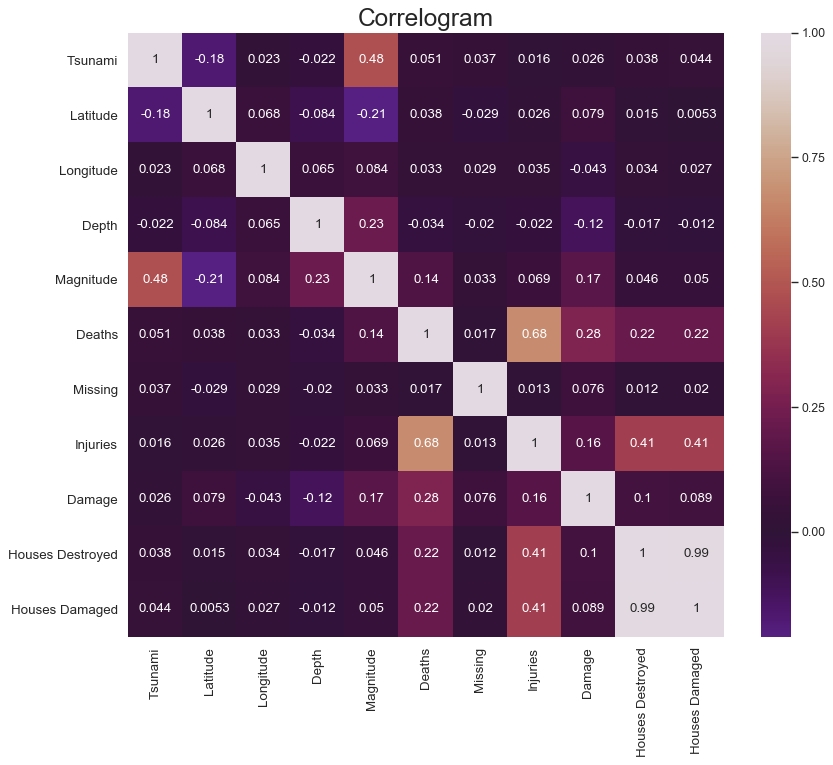

In [207]:
# Correlogram including Latitude, Longitude, Tsunami, Depth, and Magnitude

plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(damage.corr(), xticklabels=damage.corr().columns, yticklabels=damage.corr().columns, cmap='twilight', center=0, annot=True)

# Decorations
plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

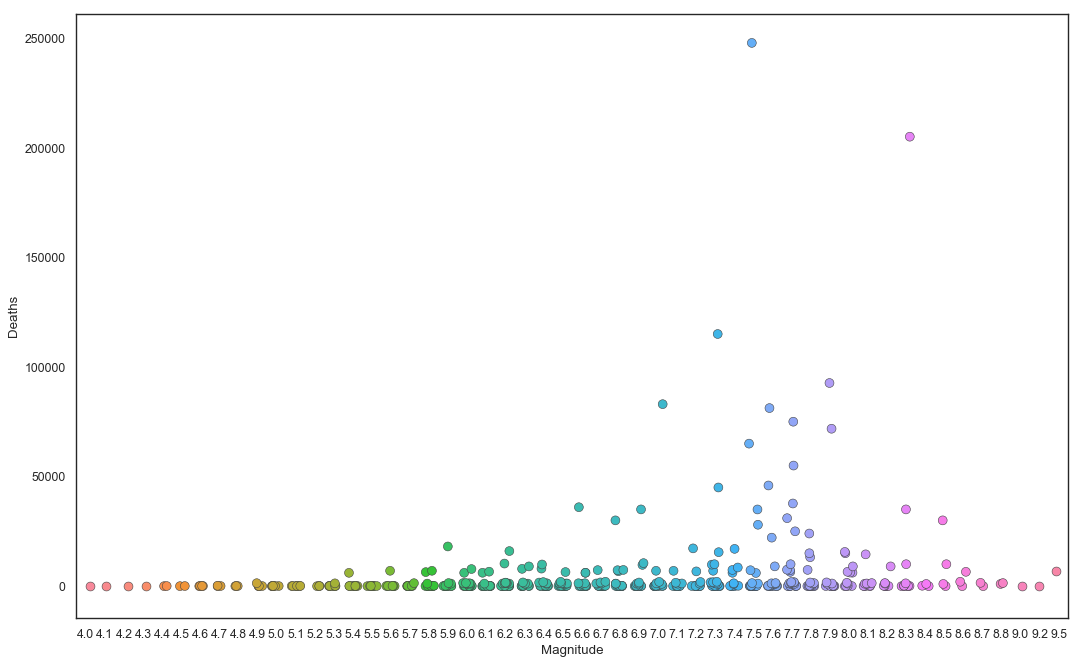

In [209]:
# A plot that counts every earthquake magnitude in the list regardless of whether there were deaths or not.
# Need to fix this to make it more readable.

df_counts = damage.groupby(['Magnitude', 'Deaths']).size().reset_index(name='counts')

# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(df_counts.Magnitude, df_counts.Deaths, jitter=0.25, size=8, ax=ax, linewidth=.5);

In [ ]:
# Setting parameters and style for sns plots below

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

In [ ]:
# Attempting a Bubble Plot. Had the right import above, ie. ConvexHull but I kept getting an error.

# # As many colors as there are unique Magnitudes
# magnitudes = np.unique(damage['Magnitude'])
# colors = [plt.cm.tab10(i/float(len(magnitudes)-1)) for i in range(len(magnitudes))]

# # Step 2: Draw Scatterplot with unique color for each magnitude
# fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')    

# # for i, magnitude in enumerate(magnitudes):
# plt.scatter('Deaths', 'Damage', data=damage.loc[damage.Magnitude==magnitude, :], s='dot_size', c=colors[i], label=str(magnitude), edgecolors='black', linewidths=.5)

    
# # Step 3: Encircling
# # https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
# def encircle(x,y, ax=None, **kw):
#     if not ax: ax=plt.gca()
#     p = np.c_[x,y]
#     hull = ConvexHull(p)
#     poly = plt.Polygon(p[hull.vertices,:], **kw)
#     ax.add_patch(poly)

# # Select data to be encircled
# damage_encircle_data = damage.loc[damage.Magnitude >= 5.0, :]                         

# # Draw polygon surrounding vertices    
# encircle(damage_encircle_data.Deaths, damage_encircle_data.Damage, ec="k", fc="gold", alpha=0.1)
# encircle(damage_encircle_data.Deaths, damage_encircle_data.Damage, ec="firebrick", fc="none", linewidth=1.5)

# # Step 4: Decorations
# plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
#               xlabel='Deaths', ylabel='Damage')

# plt.xticks(fontsize=12); plt.yticks(fontsize=12)
# plt.title("Bubble Plot with Encircling", fontsize=22)
# plt.legend(fontsize=12)    
# plt.show()    

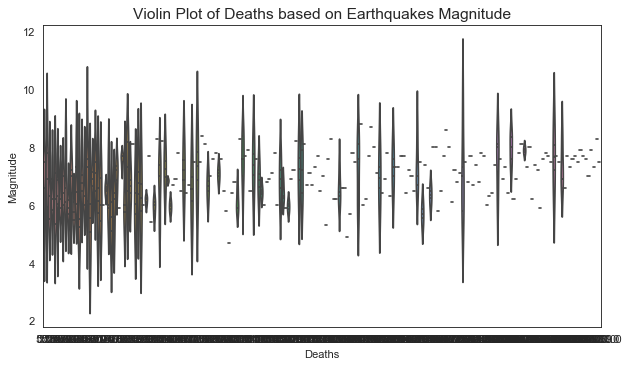

In [39]:
# Again, need to minimize the number of magnitudes the code counts to make this a nice chart.

# Draw Plot
plt.figure(figsize=(9, 5), dpi= 80)
sns.violinplot(x='Deaths', y='Magnitude', data=damage, scale='width', inner='quartile')

# Decoration
plt.title('Violin Plot of Deaths based on Earthquakes Magnitude', fontsize=14)
plt.show();

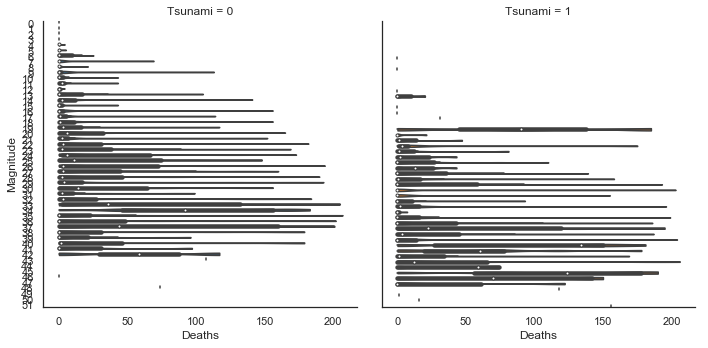

In [212]:
# Wanted to show the difference Side by Side. Need to limit the range of y
sns.catplot(x="Deaths", y="Magnitude",
            hue="Tsunami", col="Tsunami",
            data=damage_encoded,
            orient="h", height=5, aspect=1, palette="tab10",
            kind="violin", dodge=True, cut=0, bw=.2);